In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

# 시계열 데이터 분석

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/arima_data.csv', names = ['day', 'price'])
df

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298
5,2013-06-01,6739
6,2013-07-01,7107
7,2013-08-01,6492
8,2013-09-01,5693
9,2013-10-01,5497


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df.day = pd.to_datetime(df.day)
print(df.head())
print(df.info())

         day  price
0 2013-01-01   3794
1 2013-02-01   3863
2 2013-03-01   5190
3 2013-04-01   5783
4 2013-05-01   6298
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     60 non-null     datetime64[ns]
 1   price   60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB
None


In [ ]:
df = df.set_index('day').asfreq('MS')
print(df.head())
print(df.info())

            price
day              
2013-01-01   3794
2013-02-01   3863
2013-03-01   5190
2013-04-01   5783
2013-05-01   6298
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-01 to 2017-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes
None


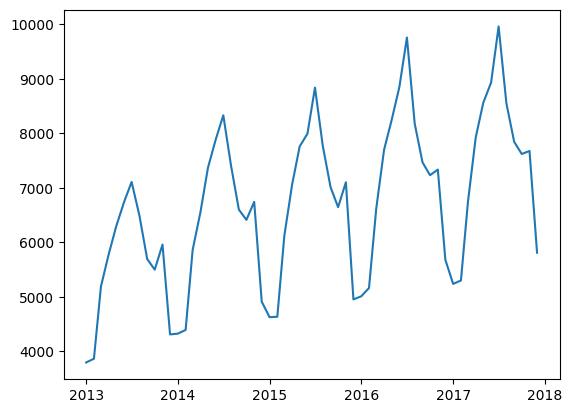

In [ ]:
plt.plot(df.index, df['price'])
plt.show()

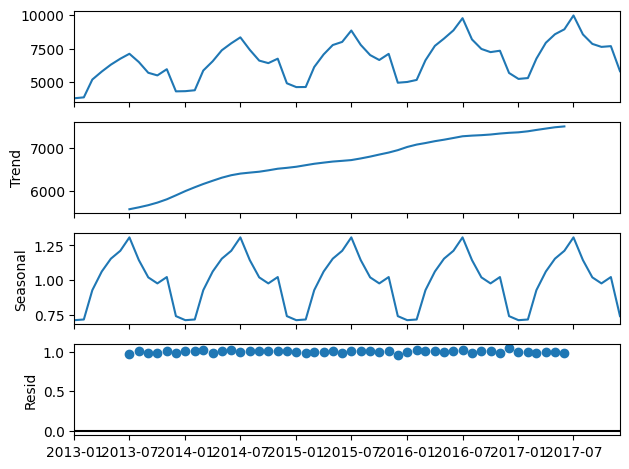

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = df
result = seasonal_decompose(ts, model = 'multiplicative')
result.plot()
plt.show()

## 정상성 변환

In [ ]:
from statsmodels.tsa.stattools import adfuller

print(df.head())
train = df[:"2016-12-01"]
test = df.drop(train.index)

adf = adfuller(train, regression = 'ct')
print("검정통계량: {}".format(adf[0]))
print("유의확률: {}".format(adf[1]))

            price
day              
2013-01-01   3794
2013-02-01   3863
2013-03-01   5190
2013-04-01   5783
2013-05-01   6298
검정통계량: -1.9997199341327594
유의확률: 0.601586330379429


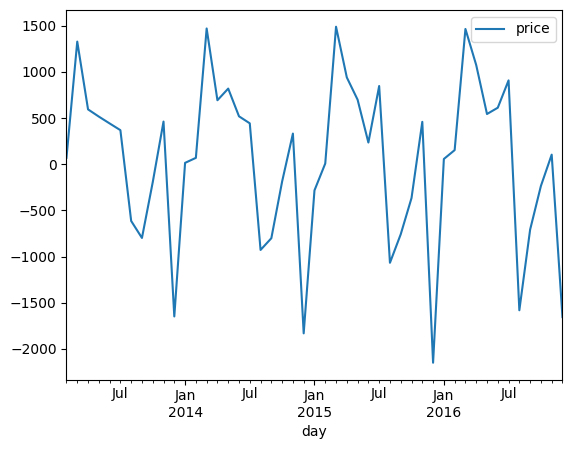

In [ ]:
# 1차 차분
diff_df = train.diff(1)
diff_df = diff_df.dropna()
diff_df.plot()
plt.show()

In [ ]:
train.diff(1).head()

,price
day,
2013-01-01,NaN
2013-02-01,69.0
2013-03-01,1327.0
2013-04-01,593.0
2013-05-01,515.0


In [ ]:
train.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


In [ ]:
adf = adfuller(diff_df, regression = 'c')
print("검정통계량: {}".format(adf[0]))
print("유의확률: {}".format(adf[1]))

검정통계량: -12.094547576926397
유의확률: 2.085160639961322e-22


## 자기회귀 모델

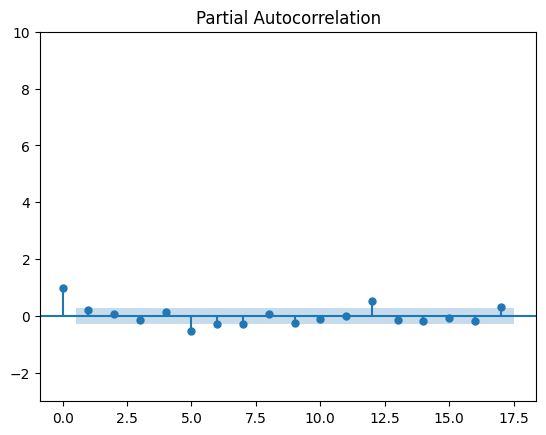

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(diff_df)
plt.ylim((-3, 10))
plt.show()

## 이동평균 모델

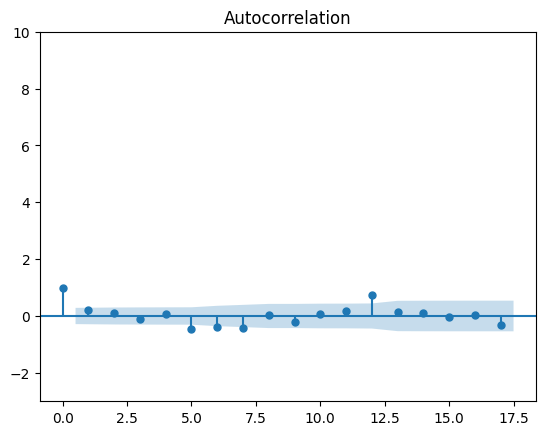

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diff_df)
plt.ylim((-3, 10))
plt.show()

## 자기회귀누적이동평균 모델

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order = (2,1,2)) # p,d,q
result = model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Wed, 08 May 2024   AIC                            761.750
Time:                        01:13:41   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3167      0.190     -6.940      0.000      -1.689      -0.945
ar.L2         -0.3191      0.190     -1.675      0.094      -0.692       0.054
ma.L1          1.9700      0.243      8.121      0.000       1.495       2.445
ma.L2          0.9950      0.241      4.126      0.000       0.522       1.468
sigma2      4.453e+05   1.13e-06   3.93e+11      0.000    4.45e+05    4.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  6e+26. Standard errors may be unstable.
"""

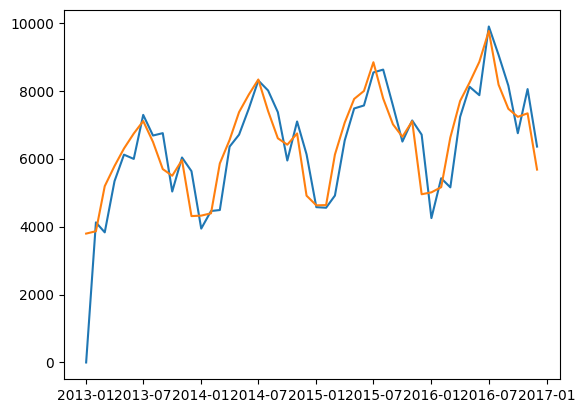

In [ ]:
plt.plot(result.predict())
plt.plot(train)
plt.show()

In [ ]:
forecast_df = result.forecast(steps = len(test))

y_pred = forecast_df
y_pred

2017-01-01    5830.560146
2017-02-01    5508.376754
2017-03-01    5883.921927
2017-04-01    5492.240862
2017-05-01    5888.140676
2017-06-01    5491.834906
2017-07-01    5887.329001
2017-08-01    5493.033200
2017-09-01    5886.010183
2017-10-01    5494.387346
2017-11-01    5884.647980
2017-12-01    5495.748885
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
y_test = test
print(y_test)

            price
day              
2017-01-01   5236
2017-02-01   5299
2017-03-01   6744
2017-04-01   7927
2017-05-01   8561
2017-06-01   8930
2017-07-01   9960
2017-08-01   8548
2017-09-01   7843
2017-10-01   7620
2017-11-01   7676
2017-12-01   5809


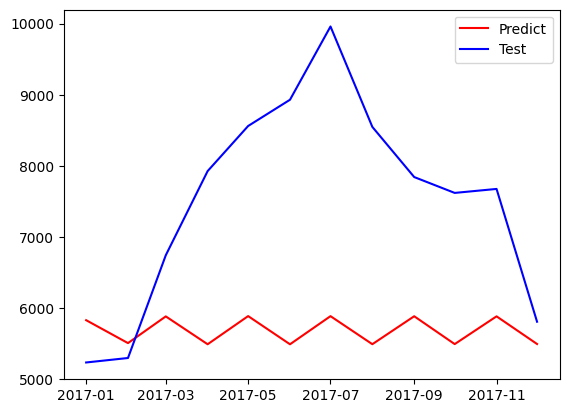

In [ ]:
plt.plot(y_pred, color = 'red', label = 'Predict') # 예측값
plt.plot(y_test, color = 'blue', label = 'Test') # 실제값
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: ", RMSE)
print("r2 score: ", r2_score(y_test, y_pred))

RMSE:  2302.26085893071
r2 score:  -1.6430396460564052


## Seasonal ARIMA 모델

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

auto_model = auto_arima(train,
                        start_p = 0, d = 1, start_q = 0,
                        max_p = 3, max_q = 3,
                        start_P = 0, start_Q = 0,
                        max_P = 3, max_Q = 3, m = 12,
                        seasonal = True,
                        information_criterion = 'aic',
                        trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.90 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=1.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.34 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.16 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.18 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.63 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.04 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.46 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.74 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.37 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.85 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=2.83 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

In [ ]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Wed, 08 May 2024   AIC                            480.687
Time:                                     01:36:55   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_df = pd.DataFrame(auto_model.predict(n_periods = len(test)), index = test.index)
auto_df.columns = ['predicted_price']
y_pred_auto = auto_df
y_pred_auto

,predicted_price
day,
2017-01-01,5609.436979
2017-02-01,5761.436979
2017-03-01,7225.436979
2017-04-01,8298.436979
2017-05-01,8841.436979
2017-06-01,9452.436979
2017-07-01,10359.436979
2017-08-01,8777.436979
2017-09-01,8068.436979


In [ ]:
y_test = test
print(y_test)

            price
day              
2017-01-01   5236
2017-02-01   5299
2017-03-01   6744
2017-04-01   7927
2017-05-01   8561
2017-06-01   8930
2017-07-01   9960
2017-08-01   8548
2017-09-01   7843
2017-10-01   7620
2017-11-01   7676
2017-12-01   5809


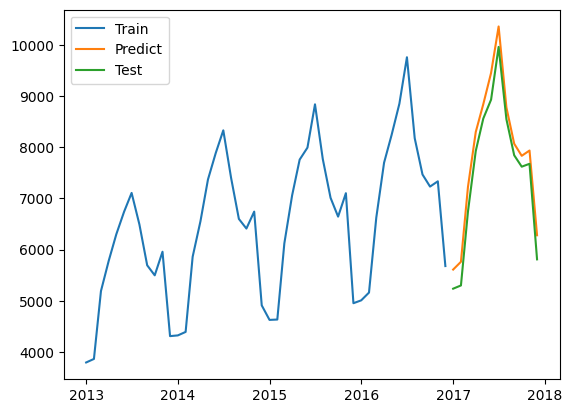

In [ ]:
plt.plot(train, label = 'Train')
plt.plot(y_pred_auto, label = 'Predict')
plt.plot(y_test, label = 'Test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE = mean_squared_error(y_test, y_pred_auto, squared=False)
print("RMSE: ", RMSE)
print("r2 score: ", r2_score(y_test, y_pred_auto))

RMSE:  373.2064274724195
r2 score:  0.9305467061841242


# 순환신경망 - RNN

In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 텐서플로우 라이브러리에서 케라스 패키지 불러오기
from tensorflow import keras

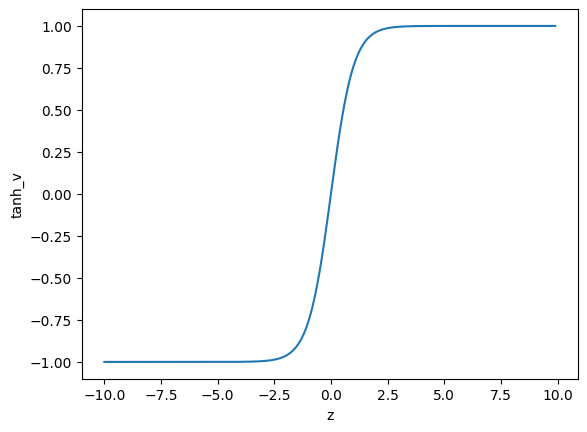

In [ ]:
# tanh 함수
z = np.arange(-10, 10, 0.1)
tanh_v = np.tanh(z)
plt.plot(z, tanh_v)
plt.xlabel('z')
plt.ylabel('tanh_v')
plt.show()

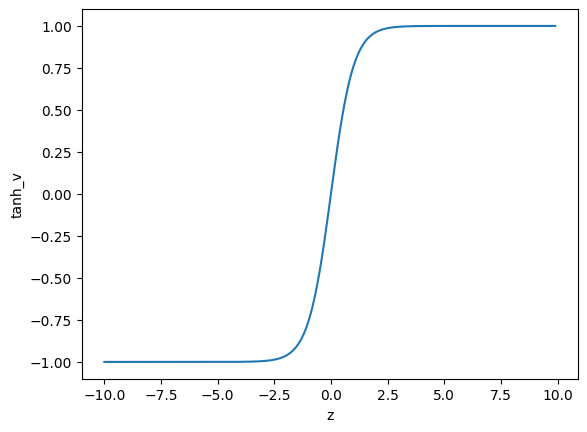

In [ ]:
z = np.arange(-10, 10, 0.1)
tanh_v = (2 / (1 + np.exp(-2*z))) - 1
plt.plot(z, tanh_v)
plt.xlabel('z')
plt.ylabel('tanh_v')
plt.show()

## IMDB 데이터

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words = 300)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 2,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 2,
 2,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 2,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 2,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 2,
 12,
 8,
 2,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 2,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 2,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 2,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 2,
 26,
 2,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,
 283,
 5,
 16,
 2,
 113,
 103,
 

In [ ]:
len(x_train[0])

218

In [ ]:
len(x_train[1])

189

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_sub, x_train_val, y_train_sub, y_train_val = train_test_split(x_train,
                                                                      y_train,
                                                                      test_size = 0.2,
                                                                      random_state=42)
print(x_train.shape)
print(x_train_sub.shape)
print(x_train_val.shape)

(25000,)
(20000,)
(5000,)


In [ ]:
length = np.array([len(x) for x in x_train_sub])

In [ ]:
length

array([259, 520, 290, ..., 300,  70,  77])

In [ ]:
print(np.mean(length))
print(np.median(length))

239.00925
178.0


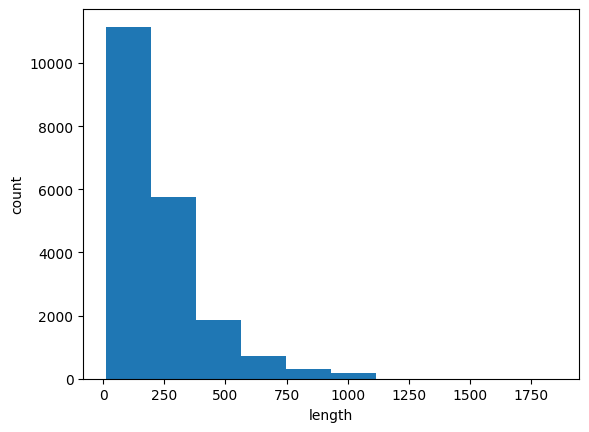

In [ ]:
plt.hist(length)
plt.xlabel('length')
plt.ylabel('count')
plt.show()

In [ ]:
# 시퀀스 패딩
# 시퀀스 = 100
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train_sub_seq = pad_sequences(x_train_sub, maxlen = 100)

In [ ]:
x_train_sub_seq.shape

(20000, 100)

In [ ]:
x_train_sub_seq[0]

array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
         2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10,   2, 158], dtype=int32)

In [ ]:
x_train_sub[0]

[1,
 73,
 89,
 81,
 25,
 60,
 2,
 6,
 20,
 141,
 17,
 14,
 31,
 127,
 12,
 60,
 28,
 2,
 2,
 66,
 45,
 6,
 20,
 15,
 2,
 8,
 79,
 17,
 2,
 8,
 112,
 6,
 2,
 20,
 17,
 2,
 2,
 4,
 2,
 20,
 9,
 2,
 6,
 2,
 7,
 2,
 2,
 6,
 185,
 250,
 24,
 55,
 2,
 5,
 23,
 2,
 7,
 15,
 82,
 24,
 15,
 2,
 66,
 10,
 10,
 45,
 2,
 15,
 4,
 20,
 2,
 8,
 30,
 17,
 2,
 5,
 2,
 17,
 2,
 190,
 4,
 20,
 9,
 43,
 32,
 99,
 2,
 18,
 15,
 8,
 157,
 46,
 17,
 2,
 4,
 2,
 5,
 2,
 9,
 32,
 2,
 5,
 2,
 267,
 17,
 73,
 17,
 2,
 36,
 26,
 2,
 43,
 2,
 83,
 4,
 2,
 247,
 74,
 83,
 4,
 250,
 2,
 82,
 4,
 96,
 4,
 250,
 2,
 8,
 32,
 4,
 2,
 9,
 184,
 2,
 13,
 2,
 48,
 14,
 16,
 147,
 2,
 59,
 62,
 69,
 2,
 12,
 46,
 50,
 9,
 53,
 2,
 74,
 2,
 11,
 14,
 31,
 151,
 10,
 10,
 4,
 20,
 9,
 2,
 2,
 2,
 5,
 45,
 6,
 2,
 2,
 33,
 269,
 8,
 2,
 142,
 2,
 5,
 2,
 17,
 73,
 17,
 204,
 5,
 2,
 19,
 55,
 2,
 2,
 92,
 66,
 104,
 14,
 20,
 93,
 76,
 2,
 151,
 33,
 4,
 58,
 12,
 188,
 2,
 151,
 12,
 215,
 69,
 224,
 142,
 73,
 237,
 6,
 2,

In [ ]:
x_train_sub_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2,   2,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94,   2,   2,   2,   2,  11, 190,  24,   2,   2,   7,  94, 205,
         2,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [ ]:
x_train_val_seq = pad_sequences(x_train_val, maxlen = 100)

## 모델 만들기

### 원핫인코딩

In [ ]:
# 단어 표현
x_train_sub_oh = keras.utils.to_categorical(x_train_sub_seq)

In [ ]:
x_train_sub_oh[0][1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
x_train_sub_seq[0]

array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
         2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10,   2, 158], dtype=int32)

In [ ]:
x_train_sub_oh.shape

(20000, 100, 300)

In [ ]:
x_train_val_oh = keras.utils.to_categorical(x_train_val_seq)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, activation='tanh', input_shape = (100, 300)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
(300 * 8) + (8 * 8) + 8

2472

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_rnn_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_oh, y_train_sub, epochs = 100, batch_size = 64,
                    validation_data = (x_train_val_oh, y_train_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 24s 72ms/step - loss: 0.7003 - accuracy: 0.5002 - val_loss: 0.6970 - val_accuracy: 0.5058
Epoch 2/100
  1/313 [..............................] - ETA: 20s - loss: 0.7191 - accuracy: 0.4531

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 13s 41ms/step - loss: 0.6956 - accuracy: 0.5123 - val_loss: 0.6946 - val_accuracy: 0.5124
Epoch 3/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6917 - accuracy: 0.5282 - val_loss: 0.6909 - val_accuracy: 0.5318
Epoch 4/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6844 - accuracy: 0.5549 - val_loss: 0.6833 - val_accuracy: 0.5690
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6784 - accuracy: 0.5778 - val_loss: 0.6797 - val_accuracy: 0.5770
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6733 - accuracy: 0.5891 - val_loss: 0.6753 - val_accuracy: 0.5862
Epoch 7/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6679 - accuracy: 0.6057 - val_loss: 0.6695 - val_accuracy: 0.5970
Epoch 8/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6614 - accuracy: 0.6197 - val_loss: 0.6636 - val_accuracy: 0.60

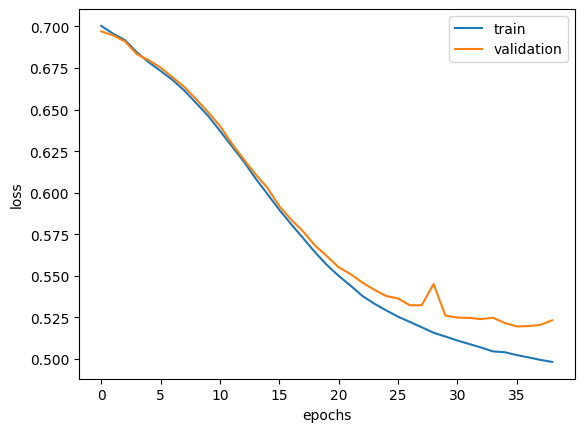

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 임베딩

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length = 100))
model.add(keras.layers.SimpleRNN(8, activation='tanh'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
(16 * 8) + (8 * 8) + 8

200

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_rnn_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_seq, y_train_sub, epochs=100, batch_size=64,
                     validation_data=(x_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 25ms/step - loss: 0.6893 - accuracy: 0.5351 - val_loss: 0.6706 - val_accuracy: 0.5872
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6399 - accuracy: 0.6467 - val_loss: 0.6234 - val_accuracy: 0.6664
Epoch 3/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6051 - accuracy: 0.6941 - val_loss: 0.6003 - val_accuracy: 0.6948
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5831 - accuracy: 0.7172 - val_loss: 0.5888 - val_accuracy: 0.7026
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5663 - accuracy: 0.7305 - val_loss: 0.5669 - val_accuracy: 0.7300
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5527 - accuracy: 0.7408 - val_loss: 0.5536 - val_accuracy: 0.7356
Epoch 7/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5410 - accuracy: 0.7475 - val_loss: 0.5422 - val_accur

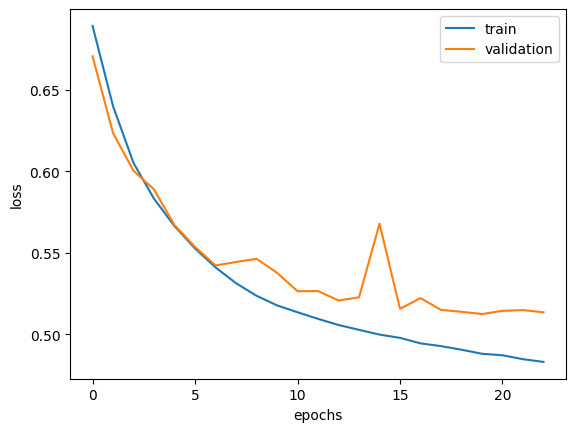

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

# RNN - sequence data

In [ ]:
n = 1000; train_n = 800

In [ ]:
a = np.arange(0, n)

In [ ]:
a

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
b = np.sin(0.02 * a)

In [ ]:
b

array([ 0.    ,  0.02  ,  0.04  ,  0.06  ,  0.0799,  0.0998,  0.1197,
        0.1395,  0.1593,  0.179 ,  0.1987,  0.2182,  0.2377,  0.2571,
        0.2764,  0.2955,  0.3146,  0.3335,  0.3523,  0.3709,  0.3894,
        0.4078,  0.4259,  0.4439,  0.4618,  0.4794,  0.4969,  0.5141,
        0.5312,  0.548 ,  0.5646,  0.581 ,  0.5972,  0.6131,  0.6288,
        0.6442,  0.6594,  0.6743,  0.6889,  0.7033,  0.7174,  0.7311,
        0.7446,  0.7578,  0.7707,  0.7833,  0.7956,  0.8076,  0.8192,
        0.8305,  0.8415,  0.8521,  0.8624,  0.8724,  0.882 ,  0.8912,
        0.9001,  0.9086,  0.9168,  0.9246,  0.932 ,  0.9391,  0.9458,
        0.9521,  0.958 ,  0.9636,  0.9687,  0.9735,  0.9779,  0.9819,
        0.9854,  0.9887,  0.9915,  0.9939,  0.9959,  0.9975,  0.9987,
        0.9995,  0.9999,  1.    ,  0.9996,  0.9988,  0.9976,  0.996 ,
        0.994 ,  0.9917,  0.9889,  0.9857,  0.9822,  0.9782,  0.9738,
        0.9691,  0.964 ,  0.9585,  0.9526,  0.9463,  0.9396,  0.9326,
        0.9252,  0.9

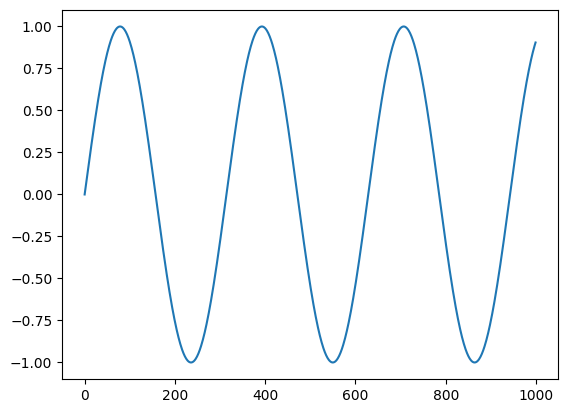

In [ ]:
plt.plot(b)
plt.show()

In [ ]:
np.random.rand(n)

array([0.2617, 0.247 , 0.9063, 0.2495, 0.2719, 0.7594, 0.4497, 0.7767,
       0.0654, 0.4876, 0.0336, 0.0627, 0.9064, 0.1392, 0.5324, 0.4111,
       0.3473, 0.8998, 0.0218, 0.6638, 0.9634, 0.5602, 0.9368, 0.0523,
       0.4188, 0.2602, 0.7308, 0.9813, 0.2565, 0.6542, 0.1981, 0.5653,
       0.4639, 0.972 , 0.6085, 0.3495, 0.1141, 0.1512, 0.2253, 0.251 ,
       0.8506, 0.5612, 0.5234, 0.1148, 0.8601, 0.7228, 0.0677, 0.7078,
       0.5435, 0.0817, 0.4583, 0.4847, 0.1658, 0.9457, 0.85  , 0.669 ,
       0.4623, 0.4118, 0.651 , 0.5454, 0.0623, 0.5125, 0.8064, 0.4592,
       0.052 , 0.7863, 0.2014, 0.2586, 0.1647, 0.3302, 0.7568, 0.5194,
       0.2049, 0.8778, 0.8796, 0.8706, 0.2388, 0.4512, 0.985 , 0.772 ,
       0.0272, 0.0652, 0.4639, 0.9092, 0.5387, 0.4978, 0.1055, 0.6568,
       0.8221, 0.3804, 0.7756, 0.9645, 0.2038, 0.5233, 0.2871, 0.7929,
       0.5776, 0.6346, 0.7979, 0.396 , 0.9151, 0.533 , 0.158 , 0.6959,
       0.7933, 0.3168, 0.8572, 0.9061, 0.2769, 0.9835, 0.1407, 0.202 ,
      

In [ ]:
a = np.arange(0, n)
b = np.sin(0.02 * a) + 2 * np.random.rand(n)
df = pd.DataFrame(b)
df.head()

,0
0,1.345406
1,1.613361
2,0.540925
3,1.309712
4,1.223407


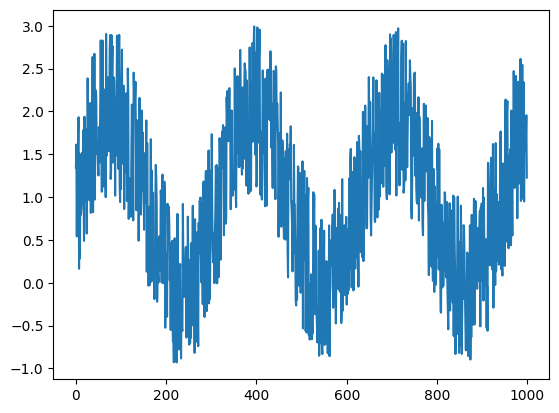

In [ ]:
plt.plot(df)
plt.show()

In [ ]:
df.shape

(1000, 1)

In [ ]:
train, test = df.values[:train_n,:], df.values[train_n:,:]

In [ ]:
print(train.shape)
print(test.shape)

(800, 1)
(200, 1)


In [ ]:
step = 4

In [ ]:
train

array([[ 1.3454],
       [ 1.6134],
       [ 0.5409],
       [ 1.3097],
       [ 1.2234],
       [ 1.7655],
       [ 1.9319],
       [ 0.1639],
       [ 1.5074],
       [ 0.2827],
       [ 1.2964],
       [ 0.7935],
       [ 0.8513],
       [ 0.963 ],
       [ 1.5189],
       [ 0.9636],
       [ 1.78  ],
       [ 1.1425],
       [ 0.489 ],
       [ 1.9384],
       [ 0.9609],
       [ 1.2733],
       [ 1.7968],
       [ 1.1089],
       [ 0.575 ],
       [ 1.2273],
       [ 2.3858],
       [ 1.7976],
       [ 1.8741],
       [ 1.8126],
       [ 0.9626],
       [ 1.4177],
       [ 2.0991],
       [ 0.8159],
       [ 1.1845],
       [ 1.1969],
       [ 1.5234],
       [ 2.635 ],
       [ 0.8239],
       [ 1.7407],
       [ 1.0761],
       [ 2.6725],
       [ 0.9713],
       [ 1.565 ],
       [ 2.2465],
       [ 2.1924],
       [ 1.6411],
       [ 1.5006],
       [ 1.6144],
       [ 1.359 ],
       [ 1.2521],
       [ 1.8182],
       [ 1.3995],
       [ 1.4473],
       [ 2.1955],
       [ 2

In [ ]:
train = np.append(train, np.repeat(train[-1,], step))
test = np.append(test, np.repeat(test[-1,], step))

In [ ]:
print(train.shape)
print(test.shape)

(804,)
(204,)


In [ ]:
train[:10]

array([1.3454, 1.6134, 0.5409, 1.3097, 1.2234, 1.7655, 1.9319, 0.1639,
       1.5074, 0.2827])

In [ ]:
train[-1]

0.8672547694637964

In [ ]:
def conv_matrix(data, step):
  X, Y = [], []
  for i in range(len(data) - step):
    d = i + step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

In [ ]:
X_train, y_train = conv_matrix(train, step)
X_test, y_test = conv_matrix(test, step)

In [ ]:
pd.concat((pd.DataFrame(X_train), pd.DataFrame(y_train)), axis = 1)

,0,1,2,3,0
0,0.370266,1.103801,1.785881,1.524414,1.693037
1,1.103801,1.785881,1.524414,1.693037,1.417400
2,1.785881,1.524414,1.693037,1.417400,1.504265
3,1.524414,1.693037,1.417400,1.504265,1.837934
4,1.693037,1.417400,1.504265,1.837934,0.658654
...,...,...,...,...,...
795,-0.021275,1.222195,-0.085791,-0.106863,-0.244477
796,1.222195,-0.085791,-0.106863,-0.244477,-0.244477
797,-0.085791,-0.106863,-0.244477,-0.244477,-0.244477
798,-0.106863,-0.244477,-0.244477,-0.244477,-0.244477


In [ ]:
print(X_train.shape)
print(X_test.shape)

(800, 4)
(200, 4)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(800, 1, 4)
(200, 1, 4)


## 모델 만들기 1

In [ ]:
# 순환신경망
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, activation='tanh', input_shape = (1,4)))
model.add(keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.001)
model.compile(optimizer = rmsprop, loss = 'mse', metrics = 'mae')

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
50/50 [==============================] - 3s 6ms/step - loss: 5.0533 - mae: 1.9156
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 2.7738 - mae: 1.3983
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 1.3213 - mae: 0.9446
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6681 - mae: 0.6632
Epoch 5/100
50/50 [==============================] - 0s 7ms/step - loss: 0.5252 - mae: 0.5895
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4888 - mae: 0.5708
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4661 - mae: 0.5603
Epoch 8/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4495 - mae: 0.5510
Epoch 9/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4410 - mae: 0.5487
Epoch 10/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4345 - mae: 0.5453
Epoch 11/100
50/50 [==============================] - 0s 5m

In [ ]:
print(history.history)

{'loss': [5.053314208984375, 2.773780107498169, 1.3213430643081665, 0.6681110858917236, 0.5251944065093994, 0.4888467490673065, 0.46610549092292786, 0.4494744837284088, 0.441046804189682, 0.4345073997974396, 0.430530309677124, 0.4280635714530945, 0.42767590284347534, 0.4244070053100586, 0.4239903390407562, 0.4239667057991028, 0.4235695004463196, 0.42229029536247253, 0.4213181734085083, 0.42209652066230774, 0.42147839069366455, 0.42129451036453247, 0.4214608371257782, 0.4197646975517273, 0.42015740275382996, 0.4195490777492523, 0.4200557768344879, 0.41955244541168213, 0.4195452928543091, 0.4193272292613983, 0.4202079474925995, 0.4197583794593811, 0.419630765914917, 0.4186711609363556, 0.41973480582237244, 0.41872939467430115, 0.4183637201786041, 0.4196307361125946, 0.418789267539978, 0.41942673921585083, 0.41806885600090027, 0.41893768310546875, 0.41860392689704895, 0.41786929965019226, 0.41892462968826294, 0.41793933510780334, 0.41767746210098267, 0.4174058437347412, 0.4187522530555725

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae'])


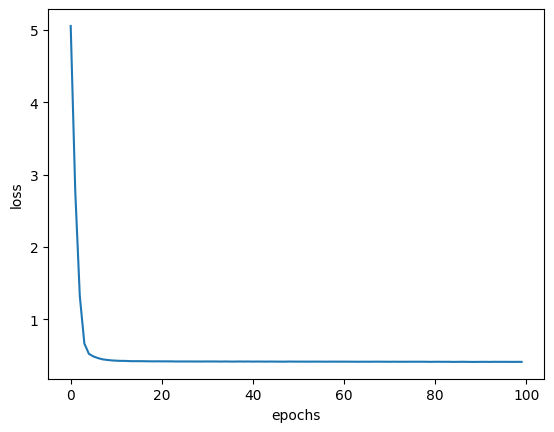

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.4041 - mae: 0.5346


[0.4041209816932678, 0.5345737934112549]

In [ ]:
pred = np.concatenate((y_train_pred, y_test_pred), axis = 0)

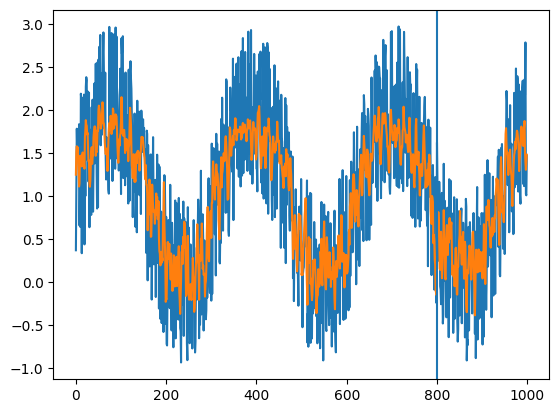

In [ ]:
index = df.index.values
plt.plot(index, df)
plt.plot(index, pred)
plt.axvline(df.index[800])
plt.show()

## 모델 만들기 2

In [ ]:
# 순환신경망
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(32, activation='tanh', input_shape = (1,4)))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1457 (5.69 KB)
Trainable params: 1457 (5.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.001)
model.compile(optimizer = rmsprop, loss = 'mse', metrics = 'mae')

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
50/50 [==============================] - 2s 5ms/step - loss: 0.5391 - mae: 0.5969
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4319 - mae: 0.5465
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4215 - mae: 0.5388
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4181 - mae: 0.5386
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4163 - mae: 0.5381
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4158 - mae: 0.5376
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4168 - mae: 0.5384
Epoch 8/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4104 - mae: 0.5315
Epoch 9/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4103 - mae: 0.5354
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4117 - mae: 0.5349
Epoch 11/100
50/50 [==============================] - 0s 4m

In [ ]:
print(history.history)

{'loss': [0.5391227602958679, 0.43194761872291565, 0.4215359091758728, 0.4180830121040344, 0.4163428843021393, 0.41584569215774536, 0.41681820154190063, 0.4104290008544922, 0.4103374481201172, 0.4117104709148407, 0.40988823771476746, 0.4094898998737335, 0.41124168038368225, 0.4055911600589752, 0.4079049229621887, 0.40924662351608276, 0.4104788303375244, 0.40469223260879517, 0.4051930606365204, 0.40589797496795654, 0.4059167802333832, 0.40643975138664246, 0.406203031539917, 0.40189412236213684, 0.40265926718711853, 0.40234842896461487, 0.40471190214157104, 0.40032723546028137, 0.40207281708717346, 0.4006977379322052, 0.40506964921951294, 0.40287649631500244, 0.4028507471084595, 0.4012846052646637, 0.40262988209724426, 0.40022873878479004, 0.39925095438957214, 0.40429437160491943, 0.4001981019973755, 0.40355291962623596, 0.40074077248573303, 0.4000369906425476, 0.40178897976875305, 0.40030959248542786, 0.4016389846801758, 0.3987997770309448, 0.3983580768108368, 0.39819061756134033, 0.400

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae'])


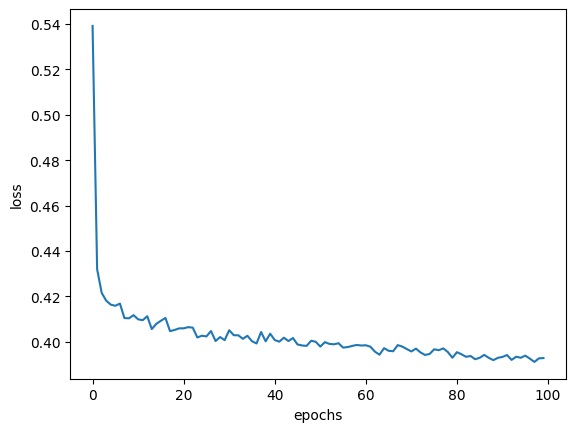

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3647 - mae: 0.5098


[0.3646518588066101, 0.5098183155059814]

In [ ]:
pred = np.concatenate((y_train_pred, y_test_pred), axis = 0)

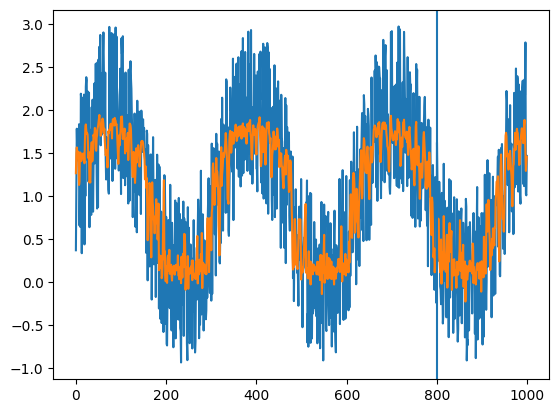

In [ ]:
index = df.index.values
plt.plot(index, df)
plt.plot(index, pred)
plt.axvline(df.index[800])
plt.show()

# 순차데이터를 이용한 1차원 합성곱 신경망 모델

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words = 500)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [ ]:
# 시퀀스 패딩
# 시퀀스 = 200
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train_seq = pad_sequences(x_train, maxlen = 200)

In [ ]:
x_train_seq.shape

(25000, 200)

In [ ]:
x_train_seq[0]

array([  5,  25, 100,  43,   2, 112,  50,   2,   2,   9,  35, 480, 284,
         5, 150,   4, 172, 112, 167,   2, 336, 385,  39,   4, 172,   2,
         2,  17,   2,  38,  13, 447,   4, 192,  50,  16,   6, 147,   2,
        19,  14,  22,   4,   2,   2, 469,   4,  22,  71,  87,  12,  16,
        43,   2,  38,  76,  15,  13,   2,   4,  22,  17,   2,  17,  12,
        16,   2,  18,   2,   5,  62, 386,  12,   8, 316,   8, 106,   5,
         4,   2,   2,  16, 480,  66,   2,  33,   4, 130,  12,  16,  38,
         2,   5,  25, 124,  51,  36, 135,  48,  25,   2,  33,   6,  22,
        12, 215,  28,  77,  52,   5,  14, 407,  16,  82,   2,   8,   4,
       107, 117,   2,  15, 256,   4,   2,   7,   2,   5,   2,  36,  71,
        43,   2, 476,  26, 400, 317,  46,   7,   4,   2,   2,  13, 104,
        88,   4, 381,  15, 297,  98,  32,   2,  56,  26, 141,   6, 194,
         2,  18,   4, 226,  22,  21, 134, 476,  26, 480,   5, 144,  30,
         2,  18,  51,  36,  28, 224,  92,  25, 104,   4, 226,  6

In [ ]:
x_train[0][-10:]

[2, 113, 103, 32, 15, 16, 2, 19, 178, 32]

In [ ]:
x_train_seq[5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   2, 128,  74,  12,   2, 163,  15,   4,   2,   2,   2,
         2,  32,  85, 156,  45,  40, 148, 139, 121,   2,   2,  1

## 모델 만들기

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 20, input_length = 200))
model.add(keras.layers.Conv1D(32, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPool1D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
500 * 20

10000

In [ ]:
20 * 3 * 32 + 32

1952

In [ ]:
100 * 32 * 100 + 100

320100

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 20)           10000     
                                                                 
 conv1d (Conv1D)             (None, 200, 32)           1952      
                                                                 
 max_pooling1d (MaxPooling1  (None, 100, 32)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               320100    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                      

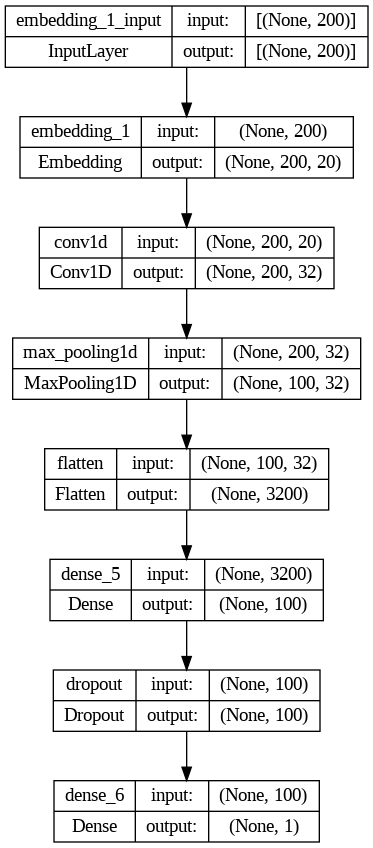

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_cnn_1d_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_seq, y_train, epochs = 20,
                    validation_split = 0.2,
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
625/625 [==============================] - 15s 23ms/step - loss: 0.6787 - accuracy: 0.5686 - val_loss: 0.6163 - val_accuracy: 0.6978
Epoch 2/20
  9/625 [..............................] - ETA: 7s - loss: 0.6134 - accuracy: 0.7014

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 11s 18ms/step - loss: 0.4911 - accuracy: 0.7746 - val_loss: 0.4336 - val_accuracy: 0.8044
Epoch 3/20
625/625 [==============================] - 12s 19ms/step - loss: 0.3941 - accuracy: 0.8245 - val_loss: 0.4053 - val_accuracy: 0.8138
Epoch 4/20
625/625 [==============================] - 10s 16ms/step - loss: 0.3726 - accuracy: 0.8359 - val_loss: 0.3928 - val_accuracy: 0.8220
Epoch 5/20
625/625 [==============================] - 12s 19ms/step - loss: 0.3601 - accuracy: 0.8431 - val_loss: 0.3909 - val_accuracy: 0.8290
Epoch 6/20
625/625 [==============================] - 11s 18ms/step - loss: 0.3519 - accuracy: 0.8484 - val_loss: 0.3875 - val_accuracy: 0.8298
Epoch 7/20
625/625 [==============================] - 12s 20ms/step - loss: 0.3452 - accuracy: 0.8503 - val_loss: 0.3872 - val_accuracy: 0.8276
Epoch 8/20
625/625 [==============================] - 11s 18ms/step - loss: 0.3394 - accuracy: 0.8540 - val_loss: 0.3853 - val_accuracy: 0.8286
Epo

In [ ]:
print(early_stopping_cb.stopped_epoch)

10


In [ ]:
history_df = pd.DataFrame(history.history)

In [ ]:
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
7,0.33939,0.854,0.385317,0.8286


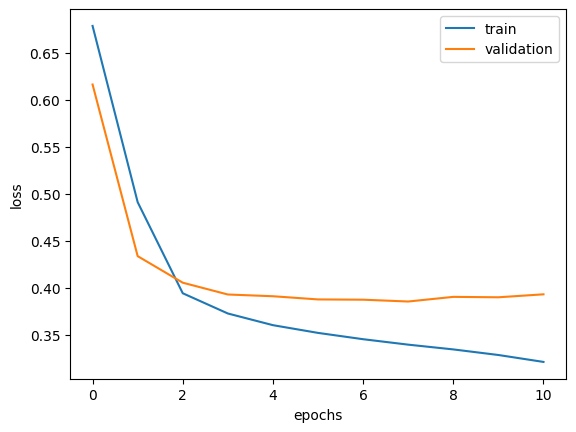

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 최종 모델

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 20, input_length = 200))
model.add(keras.layers.Conv1D(32, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPool1D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
patience = 3
opt_epoch = early_stopping_cb.stopped_epoch - patience + 1

In [ ]:
model.fit(x_train_seq, y_train, epochs = opt_epoch)

Epoch 1/8
782/782 [==============================] - 16s 18ms/step - loss: 0.6737 - accuracy: 0.5755
Epoch 2/8
782/782 [==============================] - 13s 16ms/step - loss: 0.4647 - accuracy: 0.7899
Epoch 3/8
782/782 [==============================] - 12s 16ms/step - loss: 0.3873 - accuracy: 0.8268
Epoch 4/8
782/782 [==============================] - 12s 16ms/step - loss: 0.3673 - accuracy: 0.8378
Epoch 5/8
782/782 [==============================] - 15s 19ms/step - loss: 0.3574 - accuracy: 0.8438
Epoch 6/8
782/782 [==============================] - 11s 14ms/step - loss: 0.3496 - accuracy: 0.8490
Epoch 7/8
782/782 [==============================] - 13s 16ms/step - loss: 0.3434 - accuracy: 0.8516
Epoch 8/8
782/782 [==============================] - 13s 16ms/step - loss: 0.3367 - accuracy: 0.8573


In [ ]:
x_test_seq = pad_sequences(x_test, maxlen = 200)

In [ ]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
# 예측
y_test_pred = model.predict(x_test_seq)

782/782 [==============================] - 4s 5ms/step


In [ ]:
y_test_pred = np.round(y_test_pred).reshape(-1)

In [ ]:
np.mean(y_test == y_test_pred)

0.83544

In [ ]:
model.evaluate(x_test_seq, y_test)

782/782 [==============================] - 5s 6ms/step - loss: 0.3695 - accuracy: 0.8354


[0.369540274143219, 0.8354399800300598]

# 순환신경망 - LSTM

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words = 300)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_sub, x_train_val, y_train_sub, y_train_val = train_test_split(x_train,
                                                                      y_train,
                                                                      test_size = 0.2,
                                                                      random_state=42)

In [ ]:
print(x_train.shape)
print(x_train_sub.shape)
print(x_train_val.shape)

(25000,)
(20000,)
(5000,)


In [ ]:
# 시퀀스 패딩
# 시퀀스 = 100
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train_sub_seq = pad_sequences(x_train_sub, maxlen = 100)
x_train_val_seq = pad_sequences(x_train_val, maxlen = 100)

## 모델 만들기 - 기본

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
((16 * 8) + (8 * 8) + 8) * 4

800

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           4800      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5609 (21.91 KB)
Trainable params: 5609 (21.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_lstm_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_seq, y_train_sub, epochs=100, batch_size=64,
                     validation_data=(x_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 22s 52ms/step - loss: 0.6928 - accuracy: 0.5219 - val_loss: 0.6920 - val_accuracy: 0.5544
Epoch 2/100
  3/313 [..............................] - ETA: 11s - loss: 0.6924 - accuracy: 0.5260

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 17s 55ms/step - loss: 0.6908 - accuracy: 0.5873 - val_loss: 0.6888 - val_accuracy: 0.6186
Epoch 3/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6822 - accuracy: 0.6375 - val_loss: 0.6642 - val_accuracy: 0.6740
Epoch 4/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6358 - accuracy: 0.6789 - val_loss: 0.6239 - val_accuracy: 0.6758
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6099 - accuracy: 0.6956 - val_loss: 0.6044 - val_accuracy: 0.6958
Epoch 6/100
313/313 [==============================] - 15s 46ms/step - loss: 0.5948 - accuracy: 0.7095 - val_loss: 0.5890 - val_accuracy: 0.7116
Epoch 7/100
313/313 [==============================] - 17s 56ms/step - loss: 0.5813 - accuracy: 0.7192 - val_loss: 0.5770 - val_accuracy: 0.7240
Epoch 8/100
313/313 [==============================] - 15s 47ms/step - loss: 0.5692 - accuracy: 0.7287 - val_loss: 0.5688 - val_accuracy: 0.71

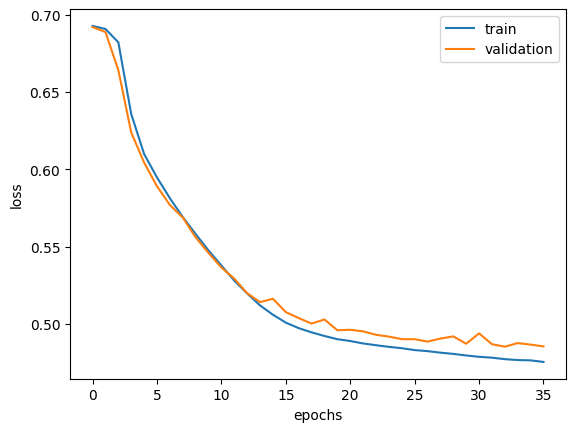

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(x_train_val_seq, y_train_val)

157/157 [==============================] - 2s 13ms/step - loss: 0.4853 - accuracy: 0.7644


[0.48531123995780945, 0.7644000053405762]

In [ ]:
x_test_seq = pad_sequences(x_test, maxlen = 100)

In [ ]:
# 최종 모델 설정(훈련 전체 데이터로 최적의 에포크만큼 훈련) 후 평가해야 함

In [ ]:
model.evaluate(x_test_seq, y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.4873 - accuracy: 0.7620


[0.4873015582561493, 0.7619600296020508]

## 모델 만들기 - 드롭아웃

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length = 100))
model.add(keras.layers.LSTM(8, dropout = 0.3))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
((16 * 8) + (8 * 8) + 8) * 4

800

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           4800      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 5609 (21.91 KB)
Trainable params: 5609 (21.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_lstm_dropout_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_seq, y_train_sub, epochs=100, batch_size=64,
                     validation_data=(x_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 49ms/step - loss: 0.6929 - accuracy: 0.5149 - val_loss: 0.6924 - val_accuracy: 0.5394
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6916 - accuracy: 0.5604 - val_loss: 0.6909 - val_accuracy: 0.5860
Epoch 3/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6892 - accuracy: 0.5917 - val_loss: 0.6876 - val_accuracy: 0.6056
Epoch 4/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6832 - accuracy: 0.6182 - val_loss: 0.6774 - val_accuracy: 0.6456
Epoch 5/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6563 - accuracy: 0.6635 - val_loss: 0.6199 - val_accuracy: 0.6896
Epoch 6/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6040 - accuracy: 0.6874 - val_loss: 0.5916 - val_accuracy: 0.7048
Epoch 7/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5866 - accuracy: 0.7036 - val_loss: 0.5759 - val_ac

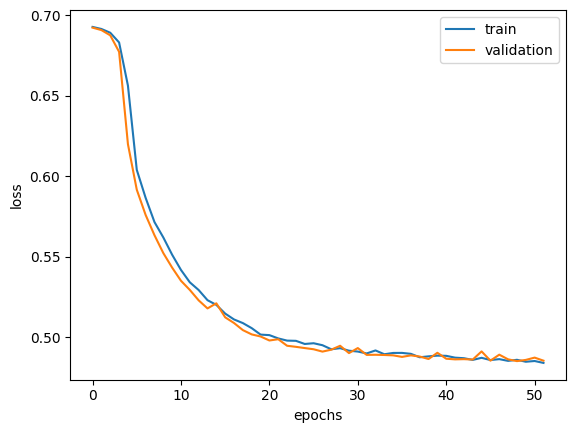

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(x_train_val_seq, y_train_val)

157/157 [==============================] - 2s 10ms/step - loss: 0.4850 - accuracy: 0.7628


[0.4850352108478546, 0.7627999782562256]

In [ ]:
x_test_seq = pad_sequences(x_test, maxlen = 100)

In [ ]:
# 최종 모델 설정(훈련 전체 데이터로 최적의 에포크만큼 훈련) 후 평가해야 함

In [ ]:
model.evaluate(x_test_seq, y_test)

782/782 [==============================] - 9s 11ms/step - loss: 0.4878 - accuracy: 0.7610


[0.4878357946872711, 0.7610399723052979]

## 모델 만들기 - 순환층 2개

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length = 100))
model.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = False))
# = model.add(keras.layers.LSTM(8, dropout = 0.3))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
((16 * 8) + (8 * 8) + 8) * 4

800

In [ ]:
((8 * 8) + (8 * 8) + 8) * 4

544

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           4800      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 6153 (24.04 KB)
Trainable params: 6153 (24.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_lstm_multi_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_seq, y_train_sub, epochs=100, batch_size=64,
                     validation_data=(x_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 35s 97ms/step - loss: 0.6929 - accuracy: 0.5229 - val_loss: 0.6927 - val_accuracy: 0.5438
Epoch 2/100
313/313 [==============================] - 27s 88ms/step - loss: 0.6922 - accuracy: 0.5579 - val_loss: 0.6917 - val_accuracy: 0.5804
Epoch 3/100
313/313 [==============================] - 29s 91ms/step - loss: 0.6904 - accuracy: 0.5880 - val_loss: 0.6887 - val_accuracy: 0.6062
Epoch 4/100
313/313 [==============================] - 27s 85ms/step - loss: 0.6843 - accuracy: 0.6108 - val_loss: 0.6777 - val_accuracy: 0.6364
Epoch 5/100
313/313 [==============================] - 28s 90ms/step - loss: 0.6607 - accuracy: 0.6422 - val_loss: 0.6369 - val_accuracy: 0.6612
Epoch 6/100
313/313 [==============================] - 29s 94ms/step - loss: 0.6093 - accuracy: 0.6758 - val_loss: 0.5864 - val_accuracy: 0.6950
Epoch 7/100
313/313 [==============================] - 29s 92ms/step - loss: 0.5782 - accuracy: 0.7020 - val_loss: 0.5655 - val_ac

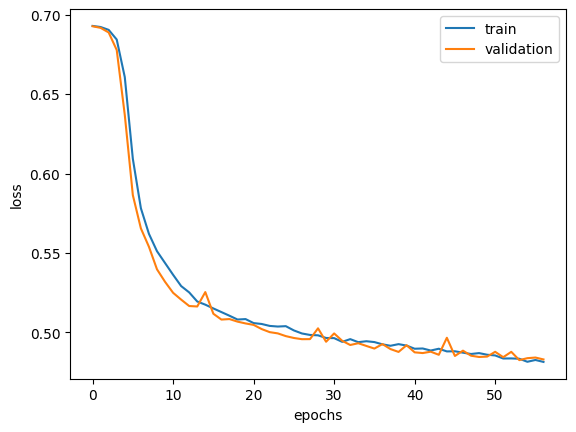

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(x_train_val_seq, y_train_val)

157/157 [==============================] - 2s 16ms/step - loss: 0.4826 - accuracy: 0.7658


[0.4825984835624695, 0.7657999992370605]

In [ ]:
x_test_seq = pad_sequences(x_test, maxlen = 100)

In [ ]:
# 최종 모델 설정(훈련 전체 데이터로 최적의 에포크만큼 훈련) 후 평가해야 함

In [ ]:
model.evaluate(x_test_seq, y_test)

782/782 [==============================] - 14s 18ms/step - loss: 0.4868 - accuracy: 0.7630


[0.4868258237838745, 0.7630400061607361]

# 순환신경망 - LSTM (로이터)

In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 텐서플로우 라이브러리에서 케라스 패키지 불러오기
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words = 1000,
                                                                        test_split = 0.2)

2110848/2110848 [==============================] - 1s 1us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(8982,)
(2246,)


In [ ]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
len(x_train[0])

87

In [ ]:
len(x_train[1])

56

In [ ]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
np.max(y_train)

45

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_sub, x_train_val, y_train_sub, y_train_val = train_test_split(x_train,
                                                                      y_train,
                                                                      test_size = 0.2,
                                                                      random_state=42)

In [ ]:
print(x_train.shape)
print(x_train_sub.shape)
print(x_train_val.shape)

(8982,)
(7185,)
(1797,)


In [ ]:
length = np.array([len(x) for x in x_train_sub])

In [ ]:
print(np.mean(length))
print(np.median(length))

145.97800974251913
95.0


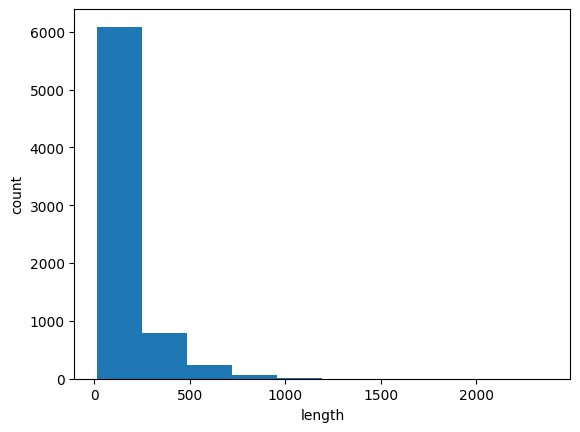

In [ ]:
plt.hist(length)
plt.xlabel('length')
plt.ylabel('count')
plt.show()

In [ ]:
# 시퀀스 패딩
# 시퀀스 = 100
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train_sub_seq = pad_sequences(x_train_sub, maxlen = 100)

In [ ]:
x_train_sub_seq.shape

(7185, 100)

In [ ]:
x_train_sub_seq[0]

array([ 37,  38,   2, 229,   6,   2, 136,   4, 198,   2, 364,   2,   4,
        37,  38, 309, 213,   8,   4, 213,   8,   4,  88,  33,  30,   2,
        31,   2,  22,   4, 740, 291,   2,   2,   2,   9,   4,   2,  33,
         2,  37,  38, 162,   6,   2,  28, 577,  87,   7,   4,   2,  76,
         2,  40, 414,   2, 445,  18,  82,   5,  37,  38,   2, 229, 136,
        10, 375, 198,   2,   2, 292, 726,  83,  48,  16,   8, 783,   5,
         4, 738,   2, 348,  42,   2,  13, 988,  22, 973,  33,  30, 582,
         7,   4, 757, 481,   4, 213,   8,  17,  12], dtype=int32)

In [ ]:
x_train_sub[0][-10:]

[582, 7, 4, 757, 481, 4, 213, 8, 17, 12]

In [ ]:
x_train_sub_seq[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   4, 248, 409,   2,
         4,  37,  38, 106, 221,  76,   6,   2,  19,  44,  35,  15,   5,
         2, 947, 755,  10, 531, 176,   8, 368,   8, 248, 459,  62, 238,
        28,  59,  12, 158,  20, 185,   4, 531, 792,  25,   2,   9,   2,
       373,   5, 282,   6,   4, 495, 298,  17,  12], dtype=int32)

In [ ]:
x_train_val_seq = pad_sequences(x_train_val, maxlen = 100)

## 모델 만들기

In [ ]:
x_train_sub_seq.shape

(7185, 100)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(1000, 100, input_length = 100))
model.add(keras.layers.LSTM(100, activation='tanh'))
model.add(keras.layers.Dense(46, activation = 'softmax'))

In [ ]:
((100 * 100) + (100 * 100) + 100) * 4

80400

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185046 (722.84 KB)
Trainable params: 185046 (722.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


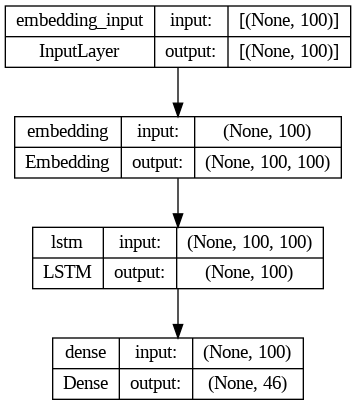

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_lstm_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_seq, y_train_sub, epochs=20, batch_size=100,
                     validation_data=(x_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
72/72 [==============================] - 28s 333ms/step - loss: 2.6678 - accuracy: 0.3449 - val_loss: 2.3570 - val_accuracy: 0.3534
Epoch 2/20
 1/72 [..............................] - ETA: 4s - loss: 2.5440 - accuracy: 0.3300

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


72/72 [==============================] - 6s 89ms/step - loss: 2.1315 - accuracy: 0.4617 - val_loss: 2.0602 - val_accuracy: 0.4752
Epoch 3/20
72/72 [==============================] - 4s 57ms/step - loss: 1.9803 - accuracy: 0.5034 - val_loss: 1.8871 - val_accuracy: 0.5159
Epoch 4/20
72/72 [==============================] - 5s 71ms/step - loss: 1.7501 - accuracy: 0.5523 - val_loss: 1.6994 - val_accuracy: 0.5904
Epoch 5/20
72/72 [==============================] - 3s 43ms/step - loss: 1.7129 - accuracy: 0.5531 - val_loss: 1.7091 - val_accuracy: 0.5459
Epoch 6/20
72/72 [==============================] - 2s 26ms/step - loss: 1.6432 - accuracy: 0.5830 - val_loss: 1.6342 - val_accuracy: 0.5949
Epoch 7/20
72/72 [==============================] - 2s 33ms/step - loss: 1.6115 - accuracy: 0.5893 - val_loss: 1.6025 - val_accuracy: 0.5993
Epoch 8/20
72/72 [==============================] - 2s 27ms/step - loss: 1.5327 - accuracy: 0.6064 - val_loss: 1.5108 - val_accuracy: 0.6244
Epoch 9/20
72/72 [======

In [ ]:
print(early_stopping_cb.stopped_epoch)

0


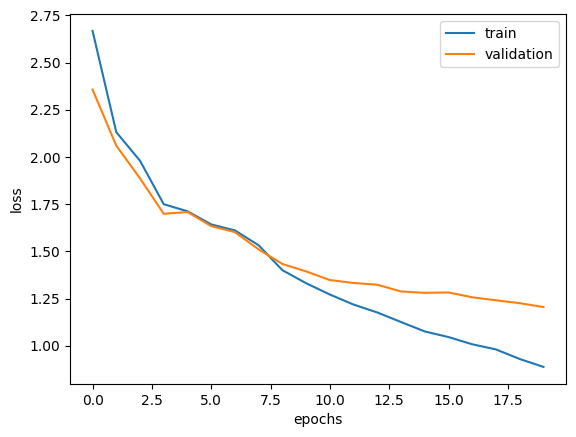

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(x_train_val_seq, y_train_val)

57/57 [==============================] - 0s 5ms/step - loss: 1.2056 - accuracy: 0.7129


[1.2056269645690918, 0.7128547430038452]

## 최종 모델

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(1000, 100, input_length = 100))
model.add(keras.layers.LSTM(100, activation='tanh'))
model.add(keras.layers.Dense(46, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
patience = 3
opt_epoch = early_stopping_cb.stopped_epoch - patience + 1

In [ ]:
x_train_seq = pad_sequences(x_train, maxlen = 100)

In [ ]:
# 최적의 에포크 못찾았으므로 20번으로 동일하게 사용
model.fit(x_train_seq, y_train, epochs = 20, batch_size=100)

Epoch 1/20
90/90 [==============================] - 16s 153ms/step - loss: 2.5928 - accuracy: 0.3456
Epoch 2/20
90/90 [==============================] - 4s 45ms/step - loss: 2.0158 - accuracy: 0.4871
Epoch 3/20
90/90 [==============================] - 4s 39ms/step - loss: 1.7826 - accuracy: 0.5374
Epoch 4/20
90/90 [==============================] - 3s 35ms/step - loss: 1.6895 - accuracy: 0.5662
Epoch 5/20
90/90 [==============================] - 3s 31ms/step - loss: 1.6326 - accuracy: 0.5813
Epoch 6/20
90/90 [==============================] - 2s 23ms/step - loss: 1.5499 - accuracy: 0.6019
Epoch 7/20
90/90 [==============================] - 2s 27ms/step - loss: 1.4729 - accuracy: 0.6277
Epoch 8/20
90/90 [==============================] - 3s 28ms/step - loss: 1.3481 - accuracy: 0.6656
Epoch 9/20
90/90 [==============================] - 3s 38ms/step - loss: 1.2360 - accuracy: 0.6954
Epoch 10/20
90/90 [==============================] - 3s 32ms/step - loss: 1.1574 - accuracy: 0.7106
Epoch 1

In [ ]:
x_test_seq = pad_sequences(x_test, maxlen = 100)

In [ ]:
y_test_pred = model.predict(x_test_seq)

71/71 [==============================] - 1s 4ms/step


In [ ]:
y_test_bin = np.argmax(y_test_pred, axis = 1)

In [ ]:
np.mean(y_test == y_test_bin)

0.7079252003561888

In [ ]:
model.evaluate(x_test_seq, y_test)

71/71 [==============================] - 1s 4ms/step - loss: 1.2072 - accuracy: 0.7079


[1.2071936130523682, 0.7079252004623413]

# LSTM & CNN

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words = 5000)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 2,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 

In [ ]:
len(x_train[0])

218

In [ ]:
len(x_train[1])

189

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
np.max(y_train)

1

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_sub, x_train_val, y_train_sub, y_train_val = train_test_split(x_train,
                                                                      y_train,
                                                                      test_size = 0.2,
                                                                      random_state=42)

In [ ]:
print(x_train.shape)
print(x_train_sub.shape)
print(x_train_val.shape)

(25000,)
(20000,)
(5000,)


In [ ]:
length = np.array([len(x) for x in x_train_sub])

In [ ]:
print(np.mean(length))
print(np.median(length))

239.00925
178.0


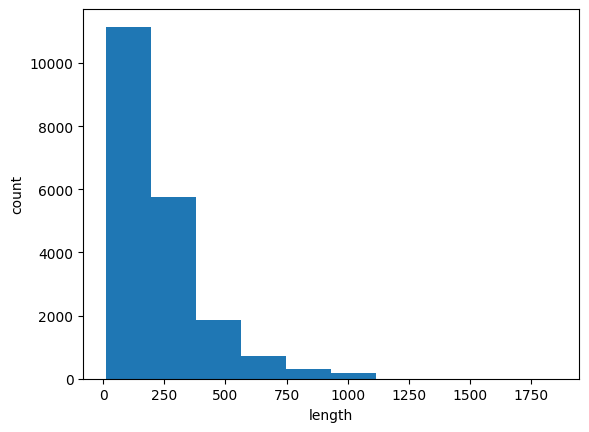

In [ ]:
plt.hist(length)
plt.xlabel('length')
plt.ylabel('count')
plt.show()

In [ ]:
# 시퀀스 패딩
# 시퀀스 = 100
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train_sub_seq = pad_sequences(x_train_sub, maxlen = 100)

In [ ]:
x_train_sub_seq.shape

(20000, 100)

In [ ]:
x_train_sub_seq[0]

array([  10,    4,   20,    9,  540,  364,  352,    5,   45,    6,    2,
        589,   33,  269,    8, 2715,  142, 1621,    5,  821,   17,   73,
         17,  204,    5, 2908,   19,   55, 1763, 4697,   92,   66,  104,
         14,   20,   93,   76, 1488,  151,   33,    4,   58,   12,  188,
        626,  151,   12,  215,   69,  224,  142,   73,  237,    6,  964,
          7, 1446, 2289,  188,  626,  103,   14,   31,   10,   10,  451,
          7, 1465,    5,  599,   80,   91, 1329,   30,  685,   34,   14,
         20,  151,   50,   26,  131,   49,    2,   84,   46,   50,   37,
         80,   79,    6, 1968,   46,    7,   14,   20,   10,   10,  470,
        158], dtype=int32)

In [ ]:
x_train_sub[0][-10:]

[6, 1968, 46, 7, 14, 20, 10, 10, 470, 158]

In [ ]:
x_train_sub_seq[5]

array([   0,    0,    0,    0,    1,  542,  195,   19,   49, 3005, 2656,
        190,    4, 2409,  352,    2,  183,   10,   10,   13,   82,   79,
          4, 1384,   36,   71,  269,    8, 1465,   25,   19,   49,    7,
          4, 2177,    2,    2, 3910,  538,   10,   10,   48,   25,   40,
       2158,   11,  843,  538,   40,    2,  543,    5,    4, 3253,  568,
         95,   14,  238,   56,  129,  890,   10,   10,   21,  691,   94,
        364,  352, 2661, 2208,   11,  190,   24,  484, 4170,    7,   94,
        205,  405,   10,   10,   87,  816,   34,   49,    2,    7,    2,
       4175, 1208,    2, 4753,  290, 3303,   46,   48,   64,   18,    4,
        816], dtype=int32)

In [ ]:
x_train_val_seq = pad_sequences(x_train_val, maxlen = 100)

## 모델 만들기

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(5000, 100, input_length = 100))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64, kernel_size = 5, activation = 'relu', padding = 'valid'))
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(55, activation='tanh'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
100 * 5 * 64 + 64

32064

In [ ]:
((64 * 55) + (55 * 55) + 55) * 4

26400

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          500000    
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            32064     
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 64)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

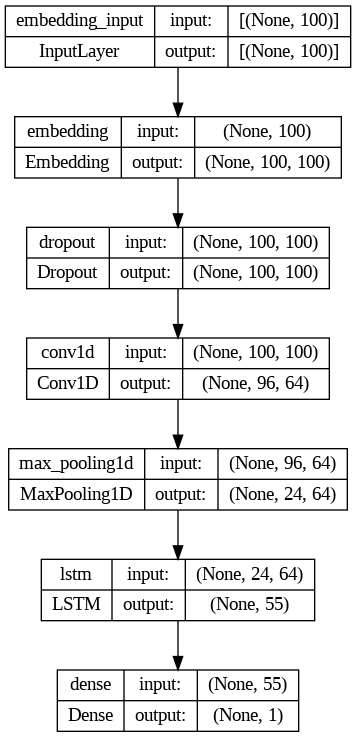

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_cnn_lstm_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_seq, y_train_sub, epochs=10, batch_size=100,
                     validation_data=(x_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
200/200 [==============================] - 68s 295ms/step - loss: 0.4757 - accuracy: 0.7501 - val_loss: 0.3452 - val_accuracy: 0.8508
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/200 [==============================] - 24s 121ms/step - loss: 0.2980 - accuracy: 0.8775 - val_loss: 0.3319 - val_accuracy: 0.8522
Epoch 3/10
200/200 [==============================] - 19s 94ms/step - loss: 0.2473 - accuracy: 0.9010 - val_loss: 0.3437 - val_accuracy: 0.8542
Epoch 4/10
200/200 [==============================] - 21s 103ms/step - loss: 0.2063 - accuracy: 0.9184 - val_loss: 0.3430 - val_accuracy: 0.8510


In [ ]:
print(early_stopping_cb.stopped_epoch)

3


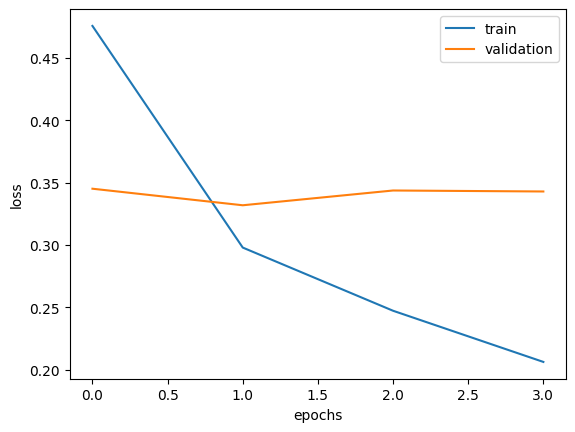

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(x_train_val_seq, y_train_val)

157/157 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8522


[0.3319040834903717, 0.8521999716758728]

## 최종 모델

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(5000, 100, input_length = 100))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64, kernel_size = 5, activation = 'relu', padding = 'valid'))
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(55, activation='tanh'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
patience = 2
opt_epoch = early_stopping_cb.stopped_epoch - patience + 1

In [ ]:
x_train_seq = pad_sequences(x_train, maxlen = 100)

In [ ]:
model.fit(x_train_seq, y_train, epochs = opt_epoch, batch_size=100)

Epoch 1/2
250/250 [==============================] - 43s 163ms/step - loss: 0.4580 - accuracy: 0.7641
Epoch 2/2
250/250 [==============================] - 26s 104ms/step - loss: 0.2898 - accuracy: 0.8788


In [ ]:
x_test_seq = pad_sequences(x_test, maxlen = 100)

In [ ]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
y_test_pred = model.predict(x_test_seq)

782/782 [==============================] - 3s 2ms/step


In [ ]:
y_test_pred

array([[0.31981257],
       [0.9723416 ],
       [0.9124774 ],
       ...,
       [0.14090246],
       [0.15714984],
       [0.7095345 ]], dtype=float32)

In [ ]:
y_test_bin = np.round(y_test_pred).reshape(-1)

In [ ]:
np.mean(y_test == y_test_bin)

0.85616

In [ ]:
model.evaluate(x_test_seq, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.3262 - accuracy: 0.8562


[0.3262120187282562, 0.8561599850654602]

# 순환신경망 - LSTM (주가)

## 데이터 탐색

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/lsda02/data/train.csv')
train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
train.tail()

,Date,Open,High,Low,Close,Volume
1504,22/12/2017,1061.109985,1064.199951,1059.439941,1060.119995,755100
1505,26/12/2017,1058.069946,1060.119995,1050.199951,1056.73999,760600
1506,27/12/2017,1057.390015,1058.369995,1048.050049,1049.369995,1271900
1507,28/12/2017,1051.599976,1054.750000,1044.770020,1048.140015,837100
1508,29/12/2017,1046.719971,1049.699951,1044.900024,1046.400024,887500


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1509 non-null   object 
 1   Open    1509 non-null   float64
 2   High    1509 non-null   float64
 3   Low     1509 non-null   float64
 4   Close   1509 non-null   object 
 5   Volume  1509 non-null   object 
dtypes: float64(3), object(3)
memory usage: 70.9+ KB


In [ ]:
train.describe()

,Open,High,Low
count,1509.000000,1509.000000,1509.000000
mean,598.150026,602.587780,593.266736
std,202.607234,203.793158,201.418625
min,279.120000,281.210000,277.220000
25%,436.860000,438.780000,434.180000
50%,563.710000,568.930000,558.470000
75%,752.920000,758.130000,746.060000
max,1075.199951,1078.489990,1063.550049


In [ ]:
train_open = train.iloc[:, [1]].values

In [ ]:
train_open.shape

(1509, 1)

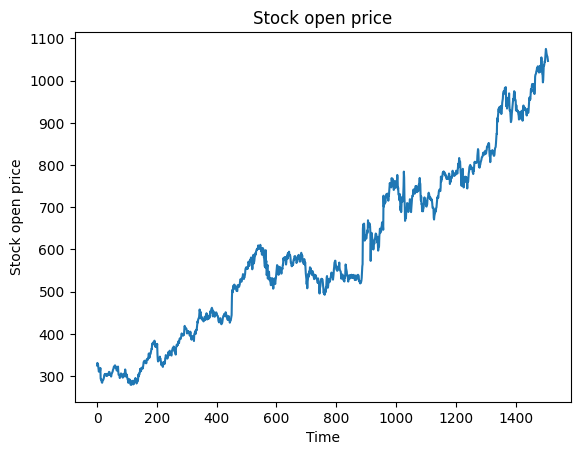

In [ ]:
plt.plot(train_open)
plt.xlabel('Time')
plt.ylabel('Stock open price')
plt.title('Stock open price')
plt.show()

In [ ]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [ ]:
train_open_scale = mms.fit_transform(train_open)

In [ ]:
train_open_scale[0:60, 0]

array([0.05794644, 0.0655085 , 0.06369963, 0.06182796, 0.05391418,
       0.04343785, 0.03953121, 0.04435484, 0.04125214, 0.04483218,
       0.04147825, 0.05047232, 0.01889257, 0.01606623, 0.01626721,
       0.01075269, 0.0072857 , 0.00653201, 0.01109185, 0.01418199,
       0.01540046, 0.01535022, 0.01898051, 0.0216938 , 0.02929354,
       0.0302231 , 0.032346  , 0.02975832, 0.03139132, 0.03204452,
       0.03291127, 0.02658024, 0.02793689, 0.02724601, 0.03230831,
       0.02920561, 0.02941916, 0.02894182, 0.03107728, 0.03645362,
       0.03875239, 0.03858909, 0.03760929, 0.02985881, 0.03048689,
       0.0311024 , 0.029796  , 0.02482163, 0.03029846, 0.03420511,
       0.03521003, 0.0378982 , 0.03929254, 0.04416642, 0.04647774,
       0.04891468, 0.05397699, 0.05298463, 0.05425334, 0.05738117])

In [ ]:
X_train = []
y_train = []
for i in range(60, len(train_open_scale)):
  X_train.append(train_open_scale[i-60: i, 0])
  y_train.append(train_open_scale[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(1449, 60)

In [ ]:
X_train[:2]

array([[0.05794644, 0.0655085 , 0.06369963, 0.06182796, 0.05391418,
        0.04343785, 0.03953121, 0.04435484, 0.04125214, 0.04483218,
        0.04147825, 0.05047232, 0.01889257, 0.01606623, 0.01626721,
        0.01075269, 0.0072857 , 0.00653201, 0.01109185, 0.01418199,
        0.01540046, 0.01535022, 0.01898051, 0.0216938 , 0.02929354,
        0.0302231 , 0.032346  , 0.02975832, 0.03139132, 0.03204452,
        0.03291127, 0.02658024, 0.02793689, 0.02724601, 0.03230831,
        0.02920561, 0.02941916, 0.02894182, 0.03107728, 0.03645362,
        0.03875239, 0.03858909, 0.03760929, 0.02985881, 0.03048689,
        0.0311024 , 0.029796  , 0.02482163, 0.03029846, 0.03420511,
        0.03521003, 0.0378982 , 0.03929254, 0.04416642, 0.04647774,
        0.04891468, 0.05397699, 0.05298463, 0.05425334, 0.05738117],
       [0.0655085 , 0.06369963, 0.06182796, 0.05391418, 0.04343785,
        0.03953121, 0.04435484, 0.04125214, 0.04483218, 0.04147825,
        0.05047232, 0.01889257, 0.01606623, 0.0

In [ ]:
y_train.shape

(1449,)

In [ ]:
y_train[:2]

array([0.05826048, 0.05720531])

In [ ]:
X_train.shape

(1449, 60)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [ ]:
X_train.shape

(1449, 60, 1)

## 모델 만들기

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, return_sequences=True, input_shape = (60, 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(50, return_sequences=False))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

In [ ]:
((1 * 50) + (50 * 50 + 50)) * 4

10400

In [ ]:
((50 * 50) + (50 * 50 + 50)) * 4

20200

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)               

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 10s 30ms/step - loss: 0.0266
Epoch 2/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0036
Epoch 3/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0035
Epoch 4/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0038
Epoch 5/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0033
Epoch 6/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0031
Epoch 7/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0027
Epoch 8/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0034
Epoch 9/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0027
Epoch 10/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0026
Epoch 11/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0025
Epoch 12/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0023
Epoch 13/100
46/46 [====

## 평가

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/lsda02/data/test.csv')
test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [ ]:
test.tail()

,Date,Open,High,Low,Close,Volume
120,25/06/2018,1143.599976,1143.910034,1112.780029,1124.810059,2157300
121,26/06/2018,1128.000000,1133.209961,1116.659058,1118.459961,1563200
122,27/06/2018,1121.339966,1131.836060,1103.619995,1103.979980,1293900
123,28/06/2018,1102.089966,1122.310059,1096.010010,1114.219971,1072400
124,29/06/2018,1120.000000,1128.227051,1115.000000,1115.650024,1315100


In [ ]:
test_open = test.iloc[:, [1]].values

In [ ]:
test_open.shape

(125, 1)

In [ ]:
df_total = pd.concat((train['Open'], test['Open']), axis = 0)

In [ ]:
print(df_total.shape)
print(train['Open'].shape)
print(test['Open'].shape)

(1634,)
(1509,)
(125,)


In [ ]:
test_input = df_total[len(df_total) - len(test) - 60:].values

In [ ]:
test_input.shape

(185,)

In [ ]:
test_input = test_input.reshape(-1, 1)

In [ ]:
test_input = mms.transform(test_input)

In [ ]:
test_input.shape

(185, 1)

In [ ]:
X_test = []

for i in range(60, len(test_input)):
  X_test.append(test_input[i-60: i, 0])

X_test = np.array(X_test)

In [ ]:
X_test.shape

(125, 60)

In [ ]:
X_test[:2]

array([[0.84962571, 0.86370723, 0.88041408, 0.88041408, 0.87252539,
        0.88977245, 0.89548795, 0.89561353, 0.89333989, 0.89519906,
        0.88795101, 0.89227219, 0.89237271, 0.86785253, 0.86580499,
        0.88041408, 0.91708126, 0.92312336, 0.92465583, 0.92715565,
        0.93287114, 0.93331076, 0.94195312, 0.93979257, 0.94387507,
        0.94823389, 0.93877501, 0.93495632, 0.93391377, 0.92966796,
        0.93382583, 0.94825904, 0.93098691, 0.93481816, 0.94950262,
        0.95059547, 0.9557834 , 0.97473874, 0.95914996, 0.93363737,
        0.92538443, 0.92144008, 0.9004372 , 0.90742142, 0.93120043,
        0.95263043, 0.9501307 , 0.95531863, 0.96347106, 0.96206417,
        0.97413581, 0.98854387, 1.        , 0.99570405, 0.98712441,
        0.98230082, 0.97848205, 0.97762796, 0.97035477, 0.96422472],
       [0.86370723, 0.88041408, 0.88041408, 0.87252539, 0.88977245,
        0.89548795, 0.89561353, 0.89333989, 0.89519906, 0.88795101,
        0.89227219, 0.89237271, 0.86785253, 0.8

In [ ]:
X_test.shape

(125, 60)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_test.shape

(125, 60, 1)

In [ ]:
# 예측
y_test_pred = model.predict(X_test)

4/4 [==============================] - 1s 9ms/step


In [ ]:
stock_price_pred = mms.inverse_transform(y_test_pred)

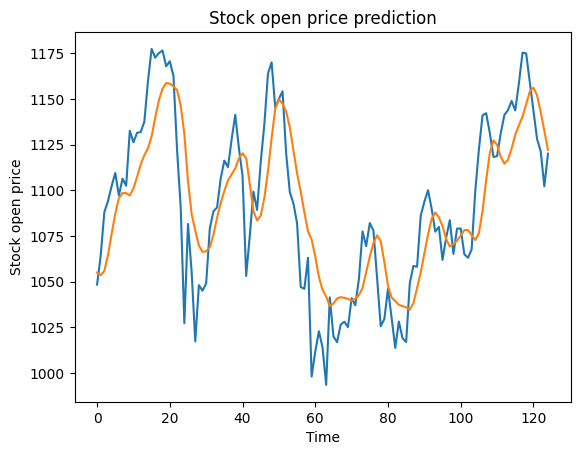

In [ ]:
plt.plot(test_open)
plt.plot(stock_price_pred)
plt.xlabel('Time')
plt.ylabel('Stock open price')
plt.title('Stock open price prediction')
plt.show()

# 순환신경망 - GRU

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words = 300)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_sub, x_train_val, y_train_sub, y_train_val = train_test_split(x_train,
                                                                      y_train,
                                                                      test_size = 0.2,
                                                                      random_state=42)

In [ ]:
print(x_train.shape)
print(x_train_sub.shape)
print(x_train_val.shape)

(25000,)
(20000,)
(5000,)


In [ ]:
# 시퀀스 패딩
# 시퀀스 = 100
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train_sub_seq = pad_sequences(x_train_sub, maxlen = 100)
x_train_val_seq = pad_sequences(x_train_val, maxlen = 100)

## 모델 만들기 - 기본

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length = 100))
model.add(keras.layers.GRU(8, activation='tanh'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
((16 * 8) + (8 * 8) + 8 + 8) * 3

624

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           4800      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5433 (21.22 KB)
Trainable params: 5433 (21.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_gru_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_seq, y_train_sub, epochs=100, batch_size=64,
                     validation_data=(x_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 24ms/step - loss: 0.6928 - accuracy: 0.5185 - val_loss: 0.6924 - val_accuracy: 0.5290
Epoch 2/100
 17/313 [>.............................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5487

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 14ms/step - loss: 0.6920 - accuracy: 0.5404 - val_loss: 0.6916 - val_accuracy: 0.5394
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6911 - accuracy: 0.5570 - val_loss: 0.6905 - val_accuracy: 0.5528
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6897 - accuracy: 0.5607 - val_loss: 0.6889 - val_accuracy: 0.5580
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6877 - accuracy: 0.5728 - val_loss: 0.6866 - val_accuracy: 0.5648
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6849 - accuracy: 0.5793 - val_loss: 0.6834 - val_accuracy: 0.5740
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6810 - accuracy: 0.5882 - val_loss: 0.6787 - val_accuracy: 0.5810
Epoch 8/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6750 - accuracy: 0.5964 - val_loss: 0.6715 - val_accuracy: 0.5976
Epo

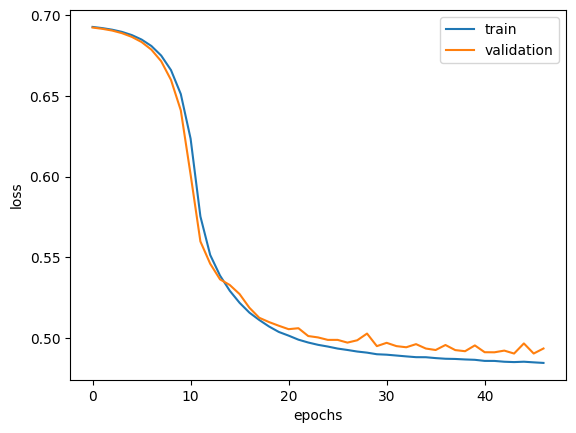

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(x_train_val_seq, y_train_val)

157/157 [==============================] - 1s 4ms/step - loss: 0.4903 - accuracy: 0.7596


[0.4903266131877899, 0.7595999836921692]

In [ ]:
x_test_seq = pad_sequences(x_test, maxlen = 100)

In [ ]:
# 최종 모델 설정(훈련 전체 데이터로 최적의 에포크만큼 훈련) 후 평가해야 함

In [ ]:
model.evaluate(x_test_seq, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.4951 - accuracy: 0.7594


[0.4950622320175171, 0.7593600153923035]

## 모델 만들기 - 드롭아웃

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length = 100))
model.add(keras.layers.GRU(8, dropout = 0.3))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
((16 * 8) + (8 * 8) + 8 + 8) * 3

624

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           4800      
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5433 (21.22 KB)
Trainable params: 5433 (21.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_gru_dropout_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_seq, y_train_sub, epochs=100, batch_size=64,
                     validation_data=(x_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 23ms/step - loss: 0.6930 - accuracy: 0.5069 - val_loss: 0.6928 - val_accuracy: 0.5082
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6925 - accuracy: 0.5224 - val_loss: 0.6923 - val_accuracy: 0.5246
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6919 - accuracy: 0.5376 - val_loss: 0.6916 - val_accuracy: 0.5330
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6910 - accuracy: 0.5455 - val_loss: 0.6905 - val_accuracy: 0.5502
Epoch 5/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6897 - accuracy: 0.5656 - val_loss: 0.6890 - val_accuracy: 0.5618
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6878 - accuracy: 0.5753 - val_loss: 0.6868 - val_accuracy: 0.5746
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6851 - accuracy: 0.5835 - val_loss: 0.6835 - val_accuracy

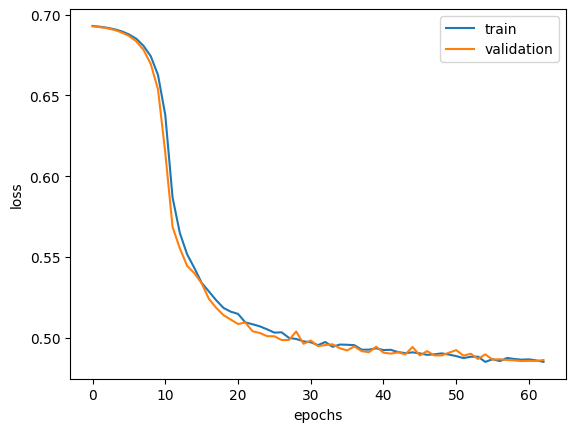

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(x_train_val_seq, y_train_val)

157/157 [==============================] - 1s 4ms/step - loss: 0.4857 - accuracy: 0.7636


[0.48568353056907654, 0.7635999917984009]

In [ ]:
x_test_seq = pad_sequences(x_test, maxlen = 100)

In [ ]:
# 최종 모델 설정(훈련 전체 데이터로 최적의 에포크만큼 훈련) 후 평가해야 함

In [ ]:
model.evaluate(x_test_seq, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.4907 - accuracy: 0.7602


[0.49074992537498474, 0.7602400183677673]

## 모델 만들기 - 순환층 2개

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length = 100))
model.add(keras.layers.GRU(8, dropout = 0.3, return_sequences = True))
model.add(keras.layers.GRU(8, dropout = 0.3))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
((16 * 8) + (8 * 8 + 8 + 8)) * 3

624

In [ ]:
((8 * 8) + (8 * 8 + 8 + 8)) * 3

432

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           4800      
                                                                 
 gru_2 (GRU)                 (None, 100, 8)            624       
                                                                 
 gru_3 (GRU)                 (None, 8)                 432       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5865 (22.91 KB)
Trainable params: 5865 (22.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_gru_multi_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_seq, y_train_sub, epochs=100, batch_size=64,
                     validation_data=(x_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 26ms/step - loss: 0.6930 - accuracy: 0.5117 - val_loss: 0.6928 - val_accuracy: 0.5368
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6926 - accuracy: 0.5268 - val_loss: 0.6922 - val_accuracy: 0.5430
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6918 - accuracy: 0.5533 - val_loss: 0.6914 - val_accuracy: 0.5430
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6906 - accuracy: 0.5544 - val_loss: 0.6897 - val_accuracy: 0.5746
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6883 - accuracy: 0.5784 - val_loss: 0.6868 - val_accuracy: 0.5850
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6843 - accuracy: 0.5856 - val_loss: 0.6815 - val_accuracy: 0.6004
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6774 - accuracy: 0.5999 - val_loss: 0.6726 - val_accuracy

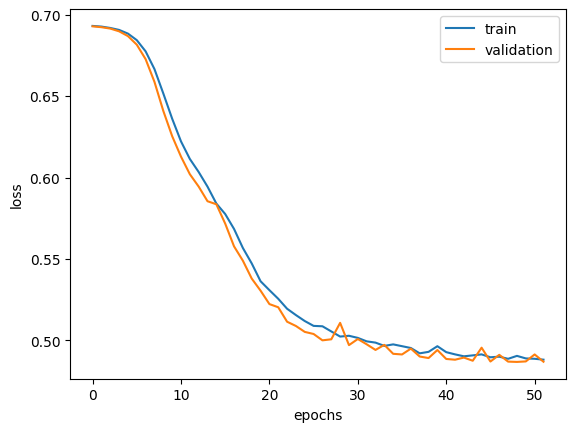

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(x_train_val_seq, y_train_val)

157/157 [==============================] - 1s 7ms/step - loss: 0.4868 - accuracy: 0.7634


[0.4868389070034027, 0.7634000182151794]

In [ ]:
x_test_seq = pad_sequences(x_test, maxlen = 100)

In [ ]:
# 최종 모델 설정(훈련 전체 데이터로 최적의 에포크만큼 훈련) 후 평가해야 함

In [ ]:
model.evaluate(x_test_seq, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.4902 - accuracy: 0.7595


[0.49016714096069336, 0.7595199942588806]

# 순환신경망 - GRU (로이터)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words = 2000,
                                                                        test_split = 0.2)

2110848/2110848 [==============================] - 1s 1us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(8982,)
(2246,)


In [ ]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
len(x_train[0])

87

In [ ]:
len(x_train[1])

56

In [ ]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
np.max(y_train)

45

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_sub, x_train_val, y_train_sub, y_train_val = train_test_split(x_train,
                                                                      y_train,
                                                                      test_size = 0.2,
                                                                      random_state=42)

In [ ]:
print(x_train.shape)
print(x_train_sub.shape)
print(x_train_val.shape)

(8982,)
(7185,)
(1797,)


In [ ]:
length = np.array([len(x) for x in x_train_sub])

In [ ]:
print(np.mean(length))
print(np.median(length))

145.97800974251913
95.0


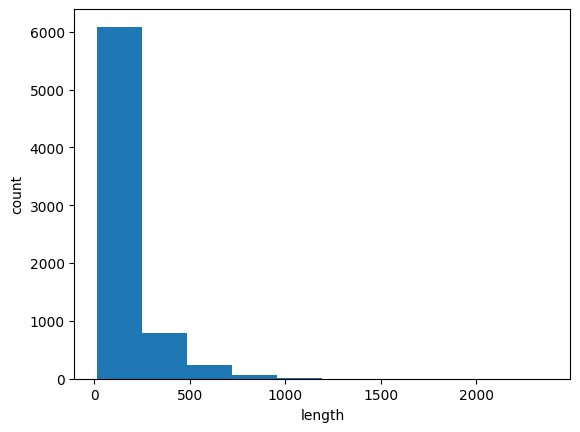

In [ ]:
plt.hist(length)
plt.xlabel('length')
plt.ylabel('count')
plt.show()

In [ ]:
# 시퀀스 패딩
# 시퀀스 = 100
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train_sub_seq = pad_sequences(x_train_sub, maxlen = 100)

In [ ]:
x_train_sub_seq.shape

(7185, 100)

In [ ]:
x_train_sub_seq[0]

array([  37,   38,    2,  229,    6,    2,  136,    4,  198,    2,  364,
          2,    4,   37,   38,  309,  213,    8,    4,  213,    8,    4,
         88,   33,   30,    2,   31, 1382,   22,    4,  740,  291, 1098,
       1641, 1731,    9,    4, 1699,   33,    2,   37,   38,  162,    6,
          2,   28,  577,   87,    7,    4,    2,   76,    2,   40,  414,
       1087,  445,   18,   82,    5,   37,   38,    2,  229,  136,   10,
        375,  198,    2,    2,  292,  726,   83,   48,   16,    8,  783,
          5,    4,  738,    2,  348,   42,    2,   13,  988,   22,  973,
         33,   30,  582,    7,    4,  757,  481,    4,  213,    8,   17,
         12], dtype=int32)

In [ ]:
x_train_sub[0][-10:]

[582, 7, 4, 757, 481, 4, 213, 8, 17, 12]

In [ ]:
x_train_sub_seq[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,    4,  248,  409, 1300,    4,   37,   38,
        106,  221,   76,    6,    2,   19,   44,   35,   15,    5, 1597,
        947,  755,   10,  531,  176,    8,  368,    8,  248,  459,   62,
        238,   28,   59,   12,  158,   20,  185,    4,  531,  792,   25,
       1253,    9,    2,  373,    5,  282,    6,    4,  495,  298,   17,
         12], dtype=int32)

In [ ]:
x_train_val_seq = pad_sequences(x_train_val, maxlen = 100)

## 모델 만들기

In [ ]:
x_train_sub_seq.shape

(7185, 100)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(2000, 100, input_length = 100))
model.add(keras.layers.GRU(100, dropout = 0.2, return_sequences=True))
model.add(keras.layers.GRU(50, dropout = 0.2, activation='tanh'))
model.add(keras.layers.Dense(46, activation = 'softmax'))

In [ ]:
((100 * 100) + (100 * 100 + 100 + 100)) * 3

60600

In [ ]:
((100 * 50) + (50 * 50 + 50 + 50)) * 3

22800

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          200000    
                                                                 
 gru (GRU)                   (None, 100, 100)          60600     
                                                                 
 gru_1 (GRU)                 (None, 50)                22800     
                                                                 
 dense (Dense)               (None, 46)                2346      
                                                                 
Total params: 285746 (1.09 MB)
Trainable params: 285746 (1.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


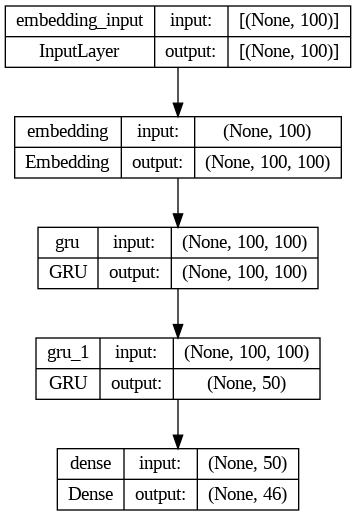

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_gru_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_seq, y_train_sub, epochs=20, batch_size=10,
                     validation_data=(x_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
719/719 [==============================] - 66s 68ms/step - loss: 2.5646 - accuracy: 0.3521 - val_loss: 2.0836 - val_accuracy: 0.3656
Epoch 2/20
  5/719 [..............................] - ETA: 18s - loss: 2.0506 - accuracy: 0.2600

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


719/719 [==============================] - 18s 26ms/step - loss: 1.9782 - accuracy: 0.4633 - val_loss: 1.9066 - val_accuracy: 0.4947
Epoch 3/20
719/719 [==============================] - 16s 22ms/step - loss: 1.8521 - accuracy: 0.5002 - val_loss: 1.8479 - val_accuracy: 0.4958
Epoch 4/20
719/719 [==============================] - 17s 24ms/step - loss: 1.7847 - accuracy: 0.5109 - val_loss: 1.7930 - val_accuracy: 0.5186
Epoch 5/20
719/719 [==============================] - 15s 21ms/step - loss: 1.7235 - accuracy: 0.5354 - val_loss: 1.7407 - val_accuracy: 0.5420
Epoch 6/20
719/719 [==============================] - 15s 21ms/step - loss: 1.6937 - accuracy: 0.5427 - val_loss: 1.7262 - val_accuracy: 0.5420
Epoch 7/20
719/719 [==============================] - 16s 22ms/step - loss: 1.6663 - accuracy: 0.5491 - val_loss: 1.7659 - val_accuracy: 0.5303
Epoch 8/20
719/719 [==============================] - 15s 21ms/step - loss: 1.6405 - accuracy: 0.5582 - val_loss: 1.7116 - val_accuracy: 0.5498
Epo

In [ ]:
print(early_stopping_cb.stopped_epoch)

11


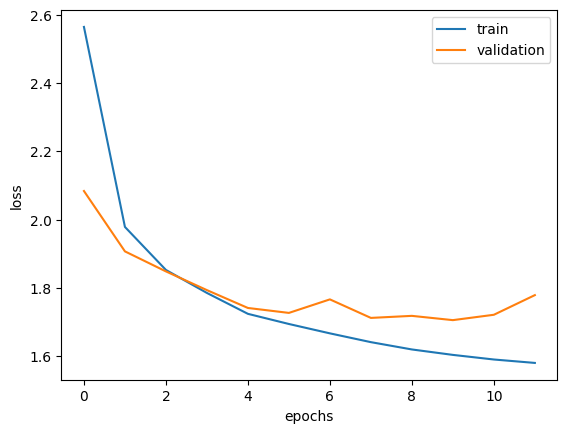

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(x_train_val_seq, y_train_val)

57/57 [==============================] - 1s 8ms/step - loss: 1.7050 - accuracy: 0.5487


[1.7050265073776245, 0.5486922860145569]

## 최종 모델

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(2000, 100, input_length = 100))
model.add(keras.layers.GRU(100, dropout = 0.2, return_sequences=True))
model.add(keras.layers.GRU(50, dropout = 0.2, activation='tanh'))
model.add(keras.layers.Dense(46, activation = 'softmax'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
patience = 3
opt_epoch = early_stopping_cb.stopped_epoch - patience + 1

In [ ]:
x_train_seq = pad_sequences(x_train, maxlen = 100)

In [ ]:
model.fit(x_train_seq, y_train, epochs = opt_epoch)

Epoch 1/9
281/281 [==============================] - 47s 154ms/step - loss: 3.0525 - accuracy: 0.3477
Epoch 2/9
281/281 [==============================] - 16s 58ms/step - loss: 2.2288 - accuracy: 0.3804
Epoch 3/9
281/281 [==============================] - 13s 46ms/step - loss: 1.9875 - accuracy: 0.4849
Epoch 4/9
281/281 [==============================] - 10s 33ms/step - loss: 1.8857 - accuracy: 0.4976
Epoch 5/9
281/281 [==============================] - 13s 45ms/step - loss: 1.8206 - accuracy: 0.5037
Epoch 6/9
281/281 [==============================] - 7s 25ms/step - loss: 1.7672 - accuracy: 0.5121
Epoch 7/9
281/281 [==============================] - 8s 30ms/step - loss: 1.7242 - accuracy: 0.5323
Epoch 8/9
281/281 [==============================] - 8s 27ms/step - loss: 1.6941 - accuracy: 0.5475
Epoch 9/9
281/281 [==============================] - 12s 44ms/step - loss: 1.6769 - accuracy: 0.5455


In [ ]:
x_test_seq = pad_sequences(x_test, maxlen = 100)

In [ ]:
y_test_pred = model.predict(x_test_seq)

71/71 [==============================] - 1s 5ms/step


In [ ]:
y_test_pred

array([[6.11597206e-05, 1.14900596e-03, 4.13920534e-05, ...,
        2.62927551e-05, 1.76869853e-05, 1.79906328e-05],
       [7.37818656e-03, 1.06772162e-01, 1.55138038e-02, ...,
        2.36385362e-03, 1.32745423e-03, 1.99256628e-03],
       [5.23132132e-03, 1.09600499e-01, 1.12301363e-02, ...,
        1.55532209e-03, 7.76268716e-04, 1.19105144e-03],
       ...,
       [5.68374417e-05, 1.04124495e-03, 3.74889823e-05, ...,
        2.45350711e-05, 1.66018926e-05, 1.65943875e-05],
       [5.97343314e-05, 1.11401279e-03, 4.00899662e-05, ...,
        2.57299616e-05, 1.73268436e-05, 1.75267414e-05],
       [5.69626037e-03, 1.09908707e-01, 1.25610065e-02, ...,
        1.74870982e-03, 9.05900321e-04, 1.36528804e-03]], dtype=float32)

In [ ]:
y_test_bin = np.argmax(y_test_pred, axis = 1)

In [ ]:
np.mean(y_test == y_test_bin)

0.48619768477292963

In [ ]:
model.evaluate(x_test_seq, y_test)

71/71 [==============================] - 1s 7ms/step - loss: 1.8944 - accuracy: 0.4862


[1.894432783126831, 0.48619768023490906]

# GRU & CNN

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words = 3000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25

In [ ]:
len(x_train[0])

218

In [ ]:
len(x_train[1])

189

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
np.max(y_train)

1

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_sub, x_train_val, y_train_sub, y_train_val = train_test_split(x_train,
                                                                      y_train,
                                                                      test_size = 0.2,
                                                                      random_state=42)

In [ ]:
print(x_train.shape)
print(x_train_sub.shape)
print(x_train_val.shape)

(25000,)
(20000,)
(5000,)


In [ ]:
length = np.array([len(x) for x in x_train_sub])

In [ ]:
print(np.mean(length))
print(np.median(length))

239.00925
178.0


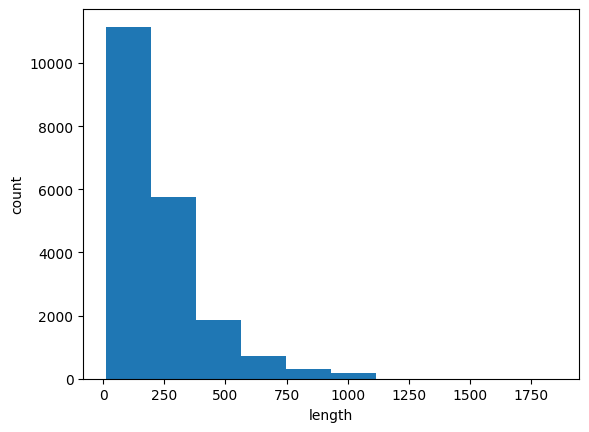

In [ ]:
plt.hist(length)
plt.xlabel('length')
plt.ylabel('count')
plt.show()

In [ ]:
# 시퀀스 패딩
# 시퀀스 = 100
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train_sub_seq = pad_sequences(x_train_sub, maxlen = 100)

In [ ]:
x_train_sub_seq.shape

(20000, 100)

In [ ]:
x_train_sub_seq[0]

array([  10,    4,   20,    9,  540,  364,  352,    5,   45,    6,    2,
        589,   33,  269,    8, 2715,  142, 1621,    5,  821,   17,   73,
         17,  204,    5, 2908,   19,   55, 1763,    2,   92,   66,  104,
         14,   20,   93,   76, 1488,  151,   33,    4,   58,   12,  188,
        626,  151,   12,  215,   69,  224,  142,   73,  237,    6,  964,
          7, 1446, 2289,  188,  626,  103,   14,   31,   10,   10,  451,
          7, 1465,    5,  599,   80,   91, 1329,   30,  685,   34,   14,
         20,  151,   50,   26,  131,   49,    2,   84,   46,   50,   37,
         80,   79,    6, 1968,   46,    7,   14,   20,   10,   10,  470,
        158], dtype=int32)

In [ ]:
x_train_sub[0][-10:]

[6, 1968, 46, 7, 14, 20, 10, 10, 470, 158]

In [ ]:
x_train_sub_seq[5]

array([   0,    0,    0,    0,    1,  542,  195,   19,   49,    2, 2656,
        190,    4, 2409,  352,    2,  183,   10,   10,   13,   82,   79,
          4, 1384,   36,   71,  269,    8, 1465,   25,   19,   49,    7,
          4, 2177,    2,    2,    2,  538,   10,   10,   48,   25,   40,
       2158,   11,  843,  538,   40,    2,  543,    5,    4,    2,  568,
         95,   14,  238,   56,  129,  890,   10,   10,   21,  691,   94,
        364,  352, 2661, 2208,   11,  190,   24,  484,    2,    7,   94,
        205,  405,   10,   10,   87,  816,   34,   49,    2,    7,    2,
          2, 1208,    2,    2,  290,    2,   46,   48,   64,   18,    4,
        816], dtype=int32)

In [ ]:
x_train_val_seq = pad_sequences(x_train_val, maxlen = 100)

## 모델 만들기

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(3000, 100, input_length = 100))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv1D(128, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPool1D(2))
model.add(keras.layers.GRU(120, dropout = 0.3, return_sequences = True))
model.add(keras.layers.GRU(60, dropout = 0.3))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
100 * 3 * 128 + 128

38528

In [ ]:
((128 * 120) + (120 * 120 + 120 + 120)) * 3

90000

In [ ]:
((120 * 60) + (60 * 60 + 60 + 60)) * 3

32760

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          300000    
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          38528     
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 128)           0         
 D)                                                              
                                                                 
 gru (GRU)                   (None, 50, 120)           90000     
                                                                 
 gru_1 (GRU)                 (None, 60)                32760     
                                                        

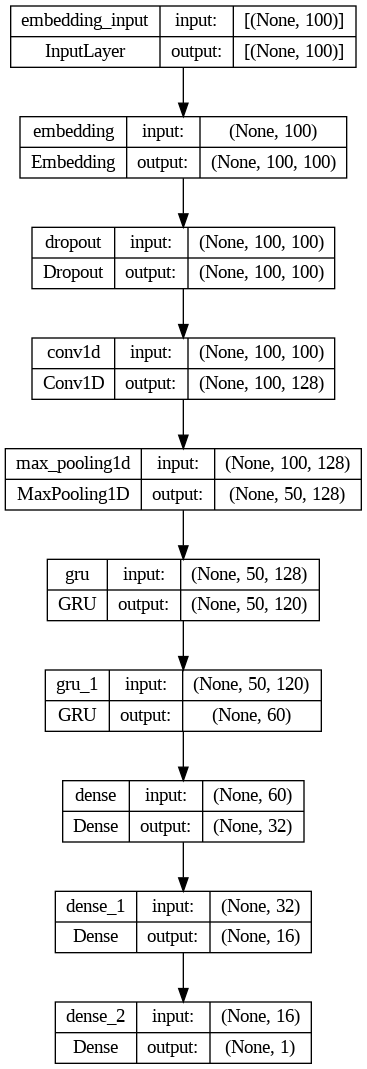

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_cnn_gru_model.h5',
                                                save_best_only = True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_sub_seq, y_train_sub, epochs=10, batch_size=100,
                     validation_data=(x_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
200/200 [==============================] - 54s 191ms/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6928 - val_accuracy: 0.5246
Epoch 2/10
  2/200 [..............................] - ETA: 10s - loss: 0.6925 - accuracy: 0.5850

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/200 [==============================] - 16s 78ms/step - loss: 0.6920 - accuracy: 0.5400 - val_loss: 0.6906 - val_accuracy: 0.5512
Epoch 3/10
200/200 [==============================] - 12s 58ms/step - loss: 0.6848 - accuracy: 0.5985 - val_loss: 0.6734 - val_accuracy: 0.6402
Epoch 4/10
200/200 [==============================] - 12s 59ms/step - loss: 0.6323 - accuracy: 0.6748 - val_loss: 0.5777 - val_accuracy: 0.7042
Epoch 5/10
200/200 [==============================] - 12s 58ms/step - loss: 0.5161 - accuracy: 0.7472 - val_loss: 0.4595 - val_accuracy: 0.7816
Epoch 6/10
200/200 [==============================] - 12s 59ms/step - loss: 0.4267 - accuracy: 0.8067 - val_loss: 0.4194 - val_accuracy: 0.8066
Epoch 7/10
200/200 [==============================] - 15s 76ms/step - loss: 0.3778 - accuracy: 0.8342 - val_loss: 0.3814 - val_accuracy: 0.8314
Epoch 8/10
200/200 [==============================] - 11s 57ms/step - loss: 0.3500 - accuracy: 0.8481 - val_loss: 0.3615 - val_accuracy: 0.8410
Epo

In [ ]:
print(early_stopping_cb.stopped_epoch)

0


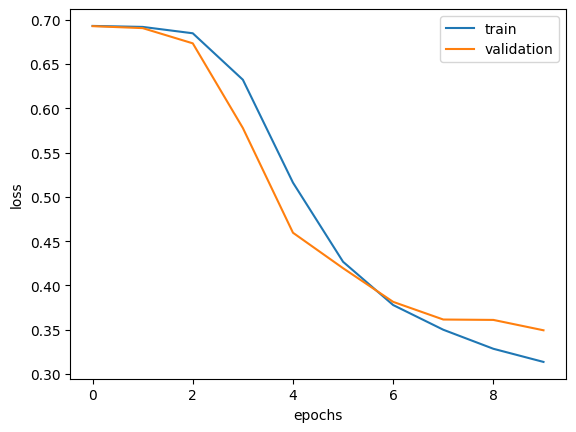

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(x_train_val_seq, y_train_val)

157/157 [==============================] - 2s 5ms/step - loss: 0.3493 - accuracy: 0.8466


[0.349330335855484, 0.8465999960899353]

## 최종 모델

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(3000, 100, input_length = 100))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv1D(128, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPool1D(2))
model.add(keras.layers.GRU(120, dropout = 0.3, return_sequences = True))
model.add(keras.layers.GRU(60, dropout = 0.3))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
patience = 2
opt_epoch = early_stopping_cb.stopped_epoch - patience + 1

In [ ]:
x_train_seq = pad_sequences(x_train, maxlen = 100)

In [ ]:
model.fit(x_train_seq, y_train, epochs = opt_epoch)

In [ ]:
x_test_seq = pad_sequences(x_test, maxlen = 100)

In [ ]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
y_test_pred = model.predict(x_test_seq)

782/782 [==============================] - 4s 4ms/step


In [ ]:
y_test_bin = np.round(y_test_pred).reshape(-1)

In [ ]:
np.mean(y_test == y_test_bin)

0.496

In [ ]:
model.evaluate(x_test_seq, y_test)

782/782 [==============================] - 6s 6ms/step - loss: 0.6932 - accuracy: 0.4960


[0.6931971907615662, 0.4959999918937683]

# 순환신경망 - GRU (주가)

## 데이터 탐색

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/lsda02/data/train.csv')
train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
train.tail()

,Date,Open,High,Low,Close,Volume
1504,22/12/2017,1061.109985,1064.199951,1059.439941,1060.119995,755100
1505,26/12/2017,1058.069946,1060.119995,1050.199951,1056.73999,760600
1506,27/12/2017,1057.390015,1058.369995,1048.050049,1049.369995,1271900
1507,28/12/2017,1051.599976,1054.750000,1044.770020,1048.140015,837100
1508,29/12/2017,1046.719971,1049.699951,1044.900024,1046.400024,887500


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1509 non-null   object 
 1   Open    1509 non-null   float64
 2   High    1509 non-null   float64
 3   Low     1509 non-null   float64
 4   Close   1509 non-null   object 
 5   Volume  1509 non-null   object 
dtypes: float64(3), object(3)
memory usage: 70.9+ KB


In [ ]:
train.describe()

,Open,High,Low
count,1509.000000,1509.000000,1509.000000
mean,598.150026,602.587780,593.266736
std,202.607234,203.793158,201.418625
min,279.120000,281.210000,277.220000
25%,436.860000,438.780000,434.180000
50%,563.710000,568.930000,558.470000
75%,752.920000,758.130000,746.060000
max,1075.199951,1078.489990,1063.550049


In [ ]:
train_open = train.iloc[:, [1]].values

In [ ]:
train_open.shape

(1509, 1)

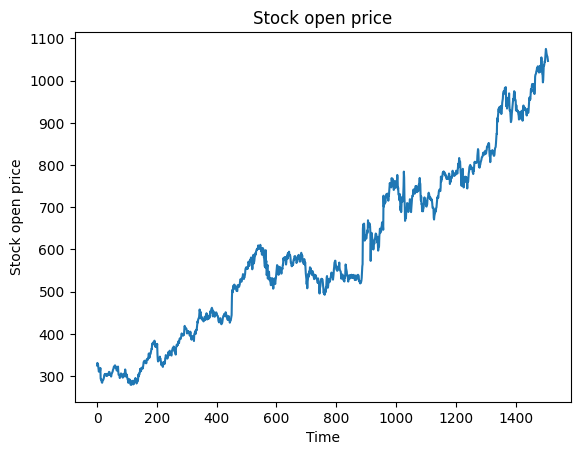

In [ ]:
plt.plot(train_open)
plt.xlabel('Time')
plt.ylabel('Stock open price')
plt.title('Stock open price')
plt.show()

In [ ]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [ ]:
train_open_scale = mms.fit_transform(train_open)

In [ ]:
train_open_scale[0:60, 0]

array([0.05794644, 0.0655085 , 0.06369963, 0.06182796, 0.05391418,
       0.04343785, 0.03953121, 0.04435484, 0.04125214, 0.04483218,
       0.04147825, 0.05047232, 0.01889257, 0.01606623, 0.01626721,
       0.01075269, 0.0072857 , 0.00653201, 0.01109185, 0.01418199,
       0.01540046, 0.01535022, 0.01898051, 0.0216938 , 0.02929354,
       0.0302231 , 0.032346  , 0.02975832, 0.03139132, 0.03204452,
       0.03291127, 0.02658024, 0.02793689, 0.02724601, 0.03230831,
       0.02920561, 0.02941916, 0.02894182, 0.03107728, 0.03645362,
       0.03875239, 0.03858909, 0.03760929, 0.02985881, 0.03048689,
       0.0311024 , 0.029796  , 0.02482163, 0.03029846, 0.03420511,
       0.03521003, 0.0378982 , 0.03929254, 0.04416642, 0.04647774,
       0.04891468, 0.05397699, 0.05298463, 0.05425334, 0.05738117])

In [ ]:
X_train = []
y_train = []
for i in range(60, len(train_open_scale)):
  X_train.append(train_open_scale[i-60: i, 0])
  y_train.append(train_open_scale[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(1449, 60)

In [ ]:
X_train[:2]

array([[0.05794644, 0.0655085 , 0.06369963, 0.06182796, 0.05391418,
        0.04343785, 0.03953121, 0.04435484, 0.04125214, 0.04483218,
        0.04147825, 0.05047232, 0.01889257, 0.01606623, 0.01626721,
        0.01075269, 0.0072857 , 0.00653201, 0.01109185, 0.01418199,
        0.01540046, 0.01535022, 0.01898051, 0.0216938 , 0.02929354,
        0.0302231 , 0.032346  , 0.02975832, 0.03139132, 0.03204452,
        0.03291127, 0.02658024, 0.02793689, 0.02724601, 0.03230831,
        0.02920561, 0.02941916, 0.02894182, 0.03107728, 0.03645362,
        0.03875239, 0.03858909, 0.03760929, 0.02985881, 0.03048689,
        0.0311024 , 0.029796  , 0.02482163, 0.03029846, 0.03420511,
        0.03521003, 0.0378982 , 0.03929254, 0.04416642, 0.04647774,
        0.04891468, 0.05397699, 0.05298463, 0.05425334, 0.05738117],
       [0.0655085 , 0.06369963, 0.06182796, 0.05391418, 0.04343785,
        0.03953121, 0.04435484, 0.04125214, 0.04483218, 0.04147825,
        0.05047232, 0.01889257, 0.01606623, 0.0

In [ ]:
y_train.shape

(1449,)

In [ ]:
y_train[:2]

array([0.05826048, 0.05720531])

In [ ]:
X_train.shape

(1449, 60)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [ ]:
X_train.shape

(1449, 60, 1)

## 모델 만들기

In [ ]:
model = keras.Sequential()
model.add(keras.layers.GRU(50, return_sequences=True, input_shape = (60, 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.GRU(50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.GRU(50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.GRU(50, return_sequences=False))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

In [ ]:
((1 * 50) + (50 * 50 + 50 + 50)) * 3

7950

In [ ]:
((50 * 50) + (50 * 50 + 50 + 50)) * 3

15300

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)                1

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 22s 26ms/step - loss: 0.0233
Epoch 2/100
46/46 [==============================] - 1s 26ms/step - loss: 0.0037
Epoch 3/100
46/46 [==============================] - 1s 25ms/step - loss: 0.0034
Epoch 4/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0033
Epoch 5/100
46/46 [==============================] - 1s 23ms/step - loss: 0.0031
Epoch 6/100
46/46 [==============================] - 1s 21ms/step - loss: 0.0028
Epoch 7/100
46/46 [==============================] - 1s 23ms/step - loss: 0.0023
Epoch 8/100
46/46 [==============================] - 1s 22ms/step - loss: 0.0029
Epoch 9/100
46/46 [==============================] - 1s 21ms/step - loss: 0.0022
Epoch 10/100
46/46 [==============================] - 1s 18ms/step - loss: 0.0022
Epoch 11/100
46/46 [==============================] - 1s 21ms/step - loss: 0.0022
Epoch 12/100
46/46 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 13/100
46/46 [====

## 평가

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/lsda02/data/test.csv')
test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [ ]:
test.tail()

,Date,Open,High,Low,Close,Volume
120,25/06/2018,1143.599976,1143.910034,1112.780029,1124.810059,2157300
121,26/06/2018,1128.000000,1133.209961,1116.659058,1118.459961,1563200
122,27/06/2018,1121.339966,1131.836060,1103.619995,1103.979980,1293900
123,28/06/2018,1102.089966,1122.310059,1096.010010,1114.219971,1072400
124,29/06/2018,1120.000000,1128.227051,1115.000000,1115.650024,1315100


In [ ]:
test_open = test.iloc[:, [1]].values

In [ ]:
test_open.shape

(125, 1)

In [ ]:
df_total = pd.concat((train['Open'], test['Open']), axis = 0)

In [ ]:
print(df_total.shape)
print(train['Open'].shape)
print(test['Open'].shape)

(1634,)
(1509,)
(125,)


In [ ]:
test_input = df_total[len(df_total) - len(test) - 60:].values

In [ ]:
test_input.shape

(185,)

In [ ]:
test_input = test_input.reshape(-1, 1)

In [ ]:
test_input = mms.transform(test_input)

In [ ]:
test_input.shape

(185, 1)

In [ ]:
X_test = []

for i in range(60, len(test_input)):
  X_test.append(test_input[i-60: i, 0])

X_test = np.array(X_test)

In [ ]:
X_test.shape

(125, 60)

In [ ]:
X_test[:2]

array([[0.84962571, 0.86370723, 0.88041408, 0.88041408, 0.87252539,
        0.88977245, 0.89548795, 0.89561353, 0.89333989, 0.89519906,
        0.88795101, 0.89227219, 0.89237271, 0.86785253, 0.86580499,
        0.88041408, 0.91708126, 0.92312336, 0.92465583, 0.92715565,
        0.93287114, 0.93331076, 0.94195312, 0.93979257, 0.94387507,
        0.94823389, 0.93877501, 0.93495632, 0.93391377, 0.92966796,
        0.93382583, 0.94825904, 0.93098691, 0.93481816, 0.94950262,
        0.95059547, 0.9557834 , 0.97473874, 0.95914996, 0.93363737,
        0.92538443, 0.92144008, 0.9004372 , 0.90742142, 0.93120043,
        0.95263043, 0.9501307 , 0.95531863, 0.96347106, 0.96206417,
        0.97413581, 0.98854387, 1.        , 0.99570405, 0.98712441,
        0.98230082, 0.97848205, 0.97762796, 0.97035477, 0.96422472],
       [0.86370723, 0.88041408, 0.88041408, 0.87252539, 0.88977245,
        0.89548795, 0.89561353, 0.89333989, 0.89519906, 0.88795101,
        0.89227219, 0.89237271, 0.86785253, 0.8

In [ ]:
X_test.shape

(125, 60)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_test.shape

(125, 60, 1)

In [ ]:
# 예측
y_test_pred = model.predict(X_test)

4/4 [==============================] - 2s 13ms/step


In [ ]:
stock_price_pred = mms.inverse_transform(y_test_pred)

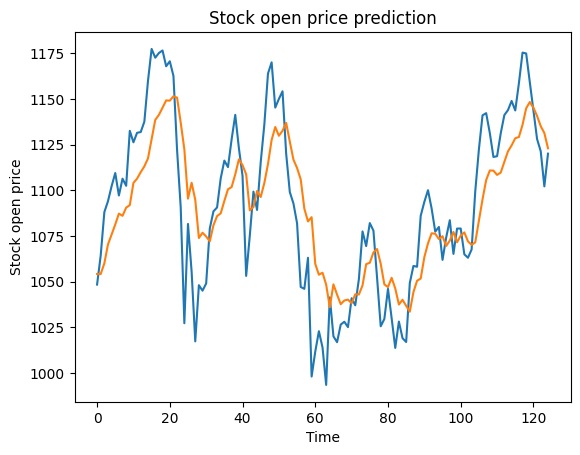

In [ ]:
plt.plot(test_open)
plt.plot(stock_price_pred)
plt.xlabel('Time')
plt.ylabel('Stock open price')
plt.title('Stock open price prediction')
plt.show()